# 1. 损失函数

① Loss损失函数一方面计算实际输出和目标之间的差距。

② Loss损失函数另一方面为我们更新输出提供一定的依据。（反向传播backward）

# 2. L1loss损失函数

① L1loss数学公式如下图所示，例子如下下图所示。

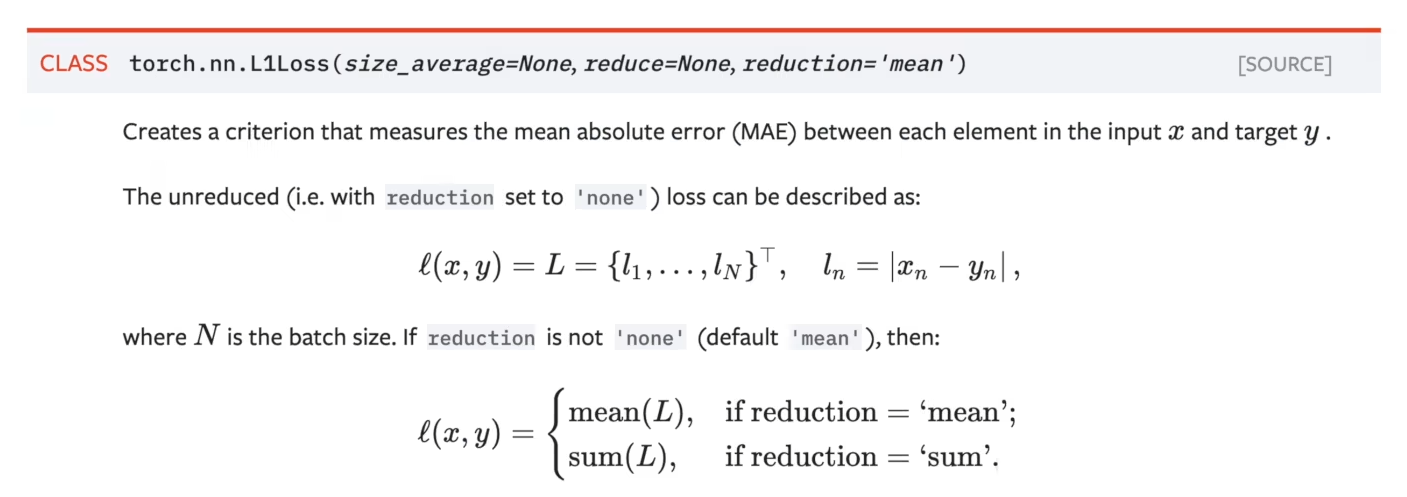

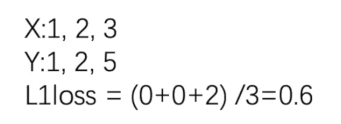

In [1]:
import torch
from torch.nn import L1Loss

inputs = torch.tensor([1,2,3], dtype=torch.float32)
targets = torch.tensor([1,2,5], dtype=torch.float32)

inputs = torch.reshape(inputs,(1,1,1,3))
targets = torch.reshape(targets,(1,1,1,3))

loss = L1Loss()  # 默认的reduction方式为“mean”
result = loss(inputs, targets)
print(result)

tensor(0.6667)


In [2]:
import torch
from torch.nn import L1Loss

inputs = torch.tensor([1,2,3],dtype=torch.float32)
targets = torch.tensor([1,2,5],dtype=torch.float32)

inputs = torch.reshape(inputs,(1,1,1,3))
targets = torch.reshape(targets,(1,1,1,3))

loss = L1Loss(reduction='sum')  # 修改为sum，三个值的差值，然后取和
result = loss(inputs, targets)
print(result)

tensor(2.)


# 3. MSE损失函数

① MSE损失函数数学公式如下图所示。

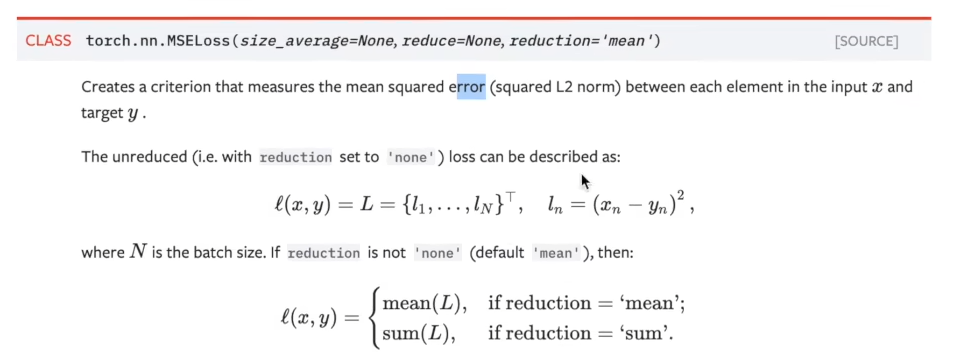

In [3]:
import torch
from torch import nn

inputs = torch.tensor([1,2,3],dtype=torch.float32)
targets = torch.tensor([1,2,5],dtype=torch.float32)

inputs = torch.reshape(inputs,(1,1,1,3))
targets = torch.reshape(targets,(1,1,1,3))

loss_mse = nn.MSELoss()
result_mse = loss_mse(inputs, targets)
print(result_mse)

tensor(1.3333)


# 4. 交叉熵损失函数

① 交叉熵损失函数数学公式如下图所示。

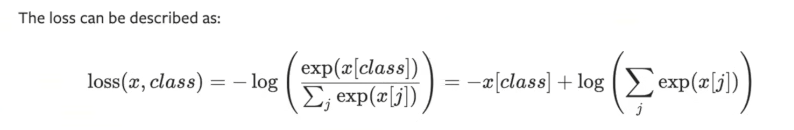

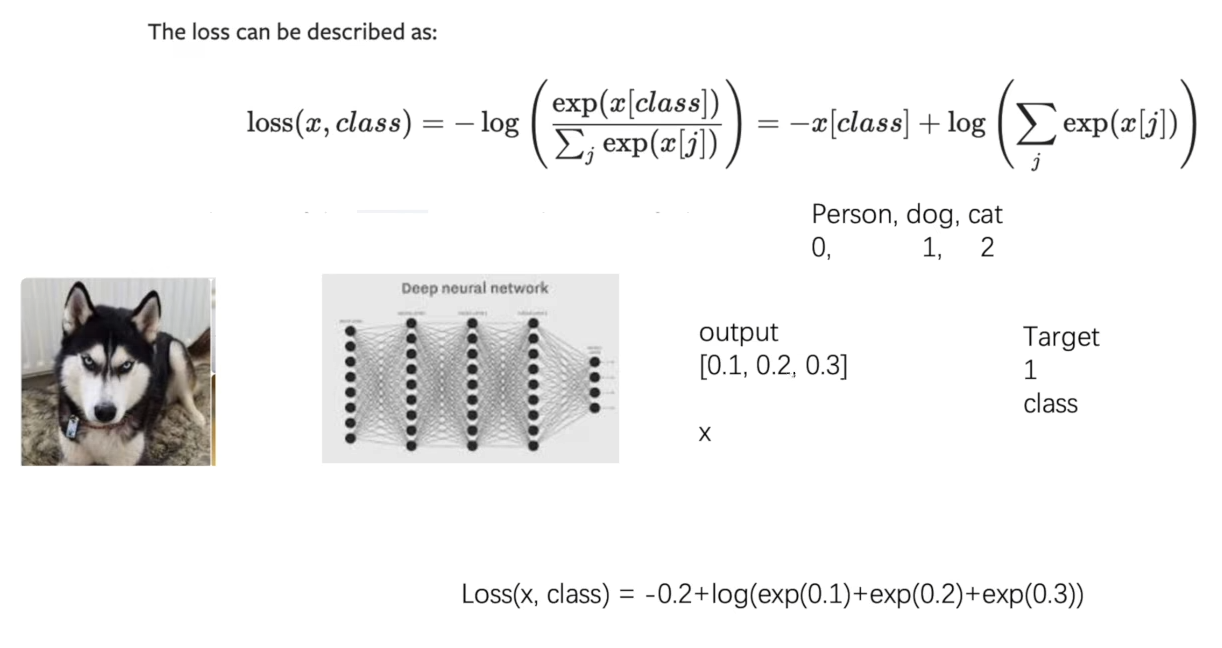

In [5]:
import torch
from torch.nn import L1Loss
from torch import nn

x = torch.tensor([0.1, 0.2, 0.3])
y = torch.tensor([1])
x = torch.reshape(x, (1,3))  # 1的 batch_size，有三类

loss_cross = nn.CrossEntropyLoss()
result_cross = loss_cross(x,y)
print(result_cross)

tensor(1.1019)


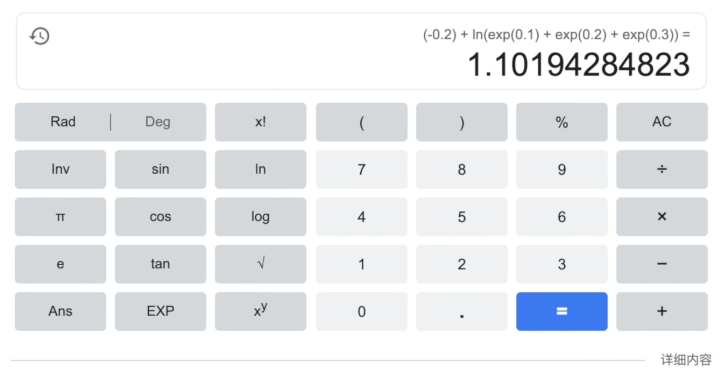

# 5. 搭建神经网络

In [6]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=1,drop_last=True)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = Sequential(
            Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x
    
tudui = Tudui()
for data in dataloader:
    imgs, targets = data
    outputs = tudui(imgs)
    print(outputs)
    print(targets)

Files already downloaded and verified
tensor([[-0.1137,  0.0592,  0.0133, -0.0387, -0.0107, -0.1013, -0.0381, -0.1019,
          0.1114,  0.0823]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0865,  0.0481,  0.0237, -0.0724, -0.0310, -0.1150, -0.0093, -0.1085,
          0.1075,  0.0708]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0930,  0.0557,  0.0209, -0.0720, -0.0169, -0.1134, -0.0258, -0.1004,
          0.1062,  0.0808]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0934,  0.0540,  0.0113, -0.0752, -0.0242, -0.1027, -0.0277, -0.0960,
          0.0996,  0.0765]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1095,  0.0496,  0.0161, -0.0389, -0.0120, -0.0922, -0.0249, -0.0971,
          0.1199,  0.0941]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1111,  0.0440,  0.0120, -0.0422, -0.0107, -0.1059, -0.0309, -0.1061,
          0.1105,  0.0750]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1076,  0.0740,  0.0059, -0.0324, -0.0084, -0.0967, -0.0405, -0

tensor([[-0.0997,  0.0484,  0.0293, -0.0662, -0.0096, -0.1060, -0.0231, -0.0934,
          0.1077,  0.0849]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1227,  0.0506,  0.0026, -0.0375, -0.0083, -0.0984, -0.0291, -0.0884,
          0.1167,  0.0840]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1017,  0.0534,  0.0237, -0.0625, -0.0106, -0.1049, -0.0268, -0.1013,
          0.0972,  0.0822]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1037,  0.0480,  0.0145, -0.0633, -0.0195, -0.0944, -0.0271, -0.0971,
          0.1073,  0.0829]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0881,  0.0580,  0.0143, -0.0672, -0.0119, -0.1121, -0.0252, -0.1058,
          0.0994,  0.0598]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1108,  0.0551,  0.0169, -0.0503, -0.0053, -0.0982, -0.0348, -0.1055,
          0.1178,  0.0830]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0997,  0.0743,  0.0205, -0.0527,  0.0015, -0.1063, -0.0042, -0.1018,
          0.1088,  0.0779]], gr

tensor([[-0.0957,  0.0753,  0.0178, -0.0654, -0.0282, -0.1026, -0.0231, -0.1032,
          0.0974,  0.0767]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0796,  0.0682,  0.0244, -0.0616, -0.0040, -0.1098, -0.0301, -0.1062,
          0.0985,  0.0723]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1138,  0.0453,  0.0036, -0.0314, -0.0210, -0.0979, -0.0324, -0.1008,
          0.1156,  0.0831]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1133,  0.0551,  0.0065, -0.0482,  0.0036, -0.1123, -0.0130, -0.0777,
          0.1113,  0.0839]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0960,  0.0633,  0.0098, -0.0360, -0.0132, -0.1050, -0.0322, -0.0902,
          0.0988,  0.0820]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1056,  0.0536,  0.0066, -0.0603, -0.0150, -0.0992, -0.0148, -0.0958,
          0.1146,  0.0835]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1012,  0.0623,  0.0116, -0.0564,  0.0025, -0.1089, -0.0315, -0.1047,
          0.1001,  0.0703]], gr

tensor([[-0.1026,  0.0606,  0.0193, -0.0533,  0.0023, -0.1048, -0.0383, -0.0963,
          0.1000,  0.0821]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0952,  0.0503,  0.0235, -0.0751, -0.0184, -0.1167, -0.0210, -0.1054,
          0.1151,  0.0785]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1029,  0.0557,  0.0047, -0.0583, -0.0091, -0.1006, -0.0370, -0.1064,
          0.1086,  0.0801]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1066,  0.0658,  0.0109, -0.0645, -0.0084, -0.1079, -0.0310, -0.1042,
          0.1109,  0.0898]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0980,  0.0890,  0.0164, -0.0674,  0.0082, -0.0875, -0.0053, -0.0940,
          0.1077,  0.1007]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0965,  0.0672,  0.0181, -0.0674, -0.0195, -0.1135, -0.0244, -0.1033,
          0.1172,  0.0729]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0949,  0.0585,  0.0119, -0.0669, -0.0042, -0.1095, -0.0241, -0.1084,
          0.1006,  0.0777]], gr

tensor([3])
tensor([[-0.1029,  0.0460,  0.0191, -0.0560, -0.0137, -0.1058, -0.0326, -0.1056,
          0.1095,  0.0773]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1087,  0.0473,  0.0053, -0.0287, -0.0098, -0.0902, -0.0295, -0.1058,
          0.1157,  0.0775]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0933,  0.0677,  0.0245, -0.0573, -0.0041, -0.0840, -0.0174, -0.0837,
          0.1079,  0.0866]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1082,  0.0617,  0.0090, -0.0478, -0.0163, -0.0878, -0.0254, -0.0890,
          0.0995,  0.0814]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1027,  0.0472,  0.0094, -0.0436, -0.0219, -0.1063, -0.0345, -0.1002,
          0.1139,  0.0781]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1137,  0.0403,  0.0042, -0.0332, -0.0146, -0.0953, -0.0410, -0.1016,
          0.1182,  0.0743]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0942,  0.0487,  0.0136, -0.0486, -0.0175, -0.1015, -0.0224, -0.0955,
          0.1066,  

tensor([[-0.1087,  0.0449,  0.0123, -0.0486, -0.0138, -0.1003, -0.0347, -0.1056,
          0.1133,  0.0793]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1030,  0.0643,  0.0106, -0.0528, -0.0140, -0.1053, -0.0224, -0.1079,
          0.1145,  0.0692]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1064,  0.0387,  0.0171, -0.0479, -0.0153, -0.0963, -0.0338, -0.0982,
          0.1187,  0.0861]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1041,  0.0653,  0.0071, -0.0352, -0.0186, -0.1010, -0.0234, -0.0941,
          0.1088,  0.0940]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1107,  0.0472,  0.0025, -0.0463, -0.0148, -0.0941, -0.0433, -0.1041,
          0.1098,  0.0827]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1158,  0.0513,  0.0136, -0.0467, -0.0084, -0.0984, -0.0323, -0.0913,
          0.1151,  0.0886]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1001,  0.0593,  0.0089, -0.0445, -0.0203, -0.1028, -0.0229, -0.0932,
          0.1229,  0.0745]], gr

tensor([[-0.0920,  0.0598,  0.0158, -0.0634,  0.0073, -0.1118, -0.0208, -0.1116,
          0.1060,  0.0734]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0951,  0.0545,  0.0039, -0.0525, -0.0174, -0.1060, -0.0317, -0.1059,
          0.1047,  0.0724]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1015,  0.0591,  0.0179, -0.0656, -0.0108, -0.1060, -0.0097, -0.0886,
          0.1031,  0.0841]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1008,  0.0630,  0.0176, -0.0718, -0.0092, -0.1036, -0.0252, -0.0979,
          0.1065,  0.0947]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1018,  0.0466,  0.0084, -0.0534, -0.0178, -0.1093, -0.0176, -0.1006,
          0.1201,  0.0843]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0776,  0.0517,  0.0154, -0.0577, -0.0144, -0.1148, -0.0235, -0.1012,
          0.1041,  0.0682]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0923,  0.0726,  0.0280, -0.0598, -0.0101, -0.0966, -0.0307, -0.0910,
          0.1001,  0.0740]], gr

tensor([[-0.1024,  0.0746,  0.0108, -0.0601,  0.0010, -0.1048, -0.0238, -0.0875,
          0.1063,  0.0907]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1028,  0.0639,  0.0049, -0.0405, -0.0089, -0.0810, -0.0150, -0.0826,
          0.1056,  0.0801]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1050,  0.0462,  0.0138, -0.0522, -0.0236, -0.1067, -0.0289, -0.1006,
          0.1130,  0.0810]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0967,  0.0693,  0.0075, -0.0426, -0.0145, -0.0972, -0.0293, -0.0941,
          0.1029,  0.0753]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1001,  0.0551,  0.0144, -0.0515, -0.0194, -0.0997, -0.0249, -0.1011,
          0.1095,  0.0833]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1039,  0.0655,  0.0149, -0.0424, -0.0104, -0.1059, -0.0233, -0.0887,
          0.1119,  0.0750]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0992,  0.0646,  0.0138, -0.0457, -0.0156, -0.0975, -0.0281, -0.0996,
          0.1073,  0.0843]], gr

tensor([[-0.1113,  0.0582,  0.0160, -0.0400, -0.0091, -0.0997, -0.0382, -0.0920,
          0.1150,  0.0909]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0891,  0.0478,  0.0191, -0.0494, -0.0141, -0.1205, -0.0369, -0.1071,
          0.0975,  0.0780]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1062,  0.0418,  0.0184, -0.0599,  0.0015, -0.1174, -0.0344, -0.0977,
          0.1161,  0.0876]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1081,  0.0452,  0.0016, -0.0628,  0.0065, -0.1152, -0.0320, -0.1129,
          0.1140,  0.0800]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0985,  0.0393,  0.0178, -0.0584, -0.0044, -0.1328, -0.0192, -0.1027,
          0.1346,  0.0702]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1084,  0.0403,  0.0015, -0.0372, -0.0118, -0.1013, -0.0334, -0.0962,
          0.1170,  0.0846]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1008,  0.0579,  0.0189, -0.0663, -0.0176, -0.1157, -0.0337, -0.1067,
          0.1064,  0.0781]], gr

tensor([[-0.1060,  0.0446,  0.0138, -0.0485, -0.0112, -0.1128, -0.0221, -0.1054,
          0.1135,  0.0779]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1101,  0.0549,  0.0066, -0.0341, -0.0184, -0.1009, -0.0232, -0.0940,
          0.1158,  0.0787]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1068,  0.0560,  0.0096, -0.0433, -0.0100, -0.0994, -0.0329, -0.0937,
          0.1151,  0.0848]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1005,  0.0710,  0.0172, -0.0708, -0.0090, -0.1030, -0.0222, -0.0935,
          0.1164,  0.0826]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1135,  0.0477,  0.0094, -0.0353, -0.0025, -0.1007, -0.0379, -0.1085,
          0.1205,  0.0775]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1166,  0.0624, -0.0054, -0.0507, -0.0100, -0.1025, -0.0363, -0.0995,
          0.1128,  0.0679]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1092,  0.0558,  0.0130, -0.0470, -0.0095, -0.0974, -0.0294, -0.0885,
          0.1101,  0.0862]], gr

tensor([0])
tensor([[-0.0899,  0.0498,  0.0117, -0.0499, -0.0194, -0.0988, -0.0273, -0.1044,
          0.1047,  0.0814]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1008,  0.0589,  0.0131, -0.0412,  0.0104, -0.0986, -0.0380, -0.1005,
          0.1033,  0.0794]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1102,  0.0658,  0.0159, -0.0567, -0.0052, -0.0960, -0.0271, -0.0849,
          0.1090,  0.1013]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0987,  0.0501,  0.0161, -0.0552, -0.0143, -0.1067, -0.0328, -0.1042,
          0.1106,  0.0879]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1016,  0.0494,  0.0196, -0.0527, -0.0152, -0.1047, -0.0276, -0.0855,
          0.1103,  0.0939]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0969,  0.0538,  0.0156, -0.0563,  0.0017, -0.1007, -0.0249, -0.1033,
          0.1143,  0.0666]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1095,  0.0568,  0.0087, -0.0384, -0.0083, -0.1001, -0.0251, -0.0968,
          0.1180,  

tensor([[-0.1001,  0.0602,  0.0138, -0.0605, -0.0076, -0.1113, -0.0319, -0.0926,
          0.1060,  0.0808]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0944,  0.0733,  0.0142, -0.0656, -0.0132, -0.0889, -0.0183, -0.0975,
          0.0984,  0.0720]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1009,  0.0426,  0.0279, -0.0580, -0.0046, -0.1198, -0.0285, -0.1053,
          0.1081,  0.0746]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1040,  0.0464,  0.0187, -0.0429,  0.0030, -0.1046, -0.0360, -0.1124,
          0.1029,  0.0891]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0994,  0.0676,  0.0187, -0.0505, -0.0069, -0.1163, -0.0192, -0.0988,
          0.1106,  0.0795]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1065,  0.0437,  0.0182, -0.0454, -0.0076, -0.1032, -0.0233, -0.1015,
          0.1183,  0.0835]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1079,  0.0521,  0.0171, -0.0477, -0.0067, -0.1048, -0.0340, -0.0878,
          0.1100,  0.0947]], gr

tensor([[-0.1245,  0.0548,  0.0213, -0.0335, -0.0005, -0.1003, -0.0356, -0.0964,
          0.1264,  0.0950]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1051,  0.0533,  0.0097, -0.0287, -0.0157, -0.1037, -0.0364, -0.1155,
          0.1233,  0.0818]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0995,  0.0619,  0.0157, -0.0635, -0.0192, -0.1020, -0.0232, -0.0856,
          0.1045,  0.0903]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1124,  0.0508,  0.0028, -0.0373, -0.0039, -0.1013, -0.0334, -0.0971,
          0.1159,  0.0726]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1008,  0.0549,  0.0161, -0.0602, -0.0190, -0.1058, -0.0324, -0.0976,
          0.1041,  0.0741]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1034,  0.0658,  0.0163, -0.0610, -0.0037, -0.0962, -0.0234, -0.1007,
          0.1139,  0.0809]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0986,  0.0432,  0.0175, -0.0687, -0.0284, -0.1122, -0.0265, -0.0993,
          0.1080,  0.0878]], gr

tensor([[-0.1101,  0.0616,  0.0168, -0.0499, -0.0077, -0.1033, -0.0271, -0.0948,
          0.1114,  0.0864]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1110,  0.0548,  0.0053, -0.0349, -0.0154, -0.0950, -0.0385, -0.0959,
          0.1197,  0.0918]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1063,  0.0547,  0.0244, -0.0521,  0.0011, -0.0994, -0.0268, -0.1010,
          0.1068,  0.0851]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1136,  0.0408,  0.0138, -0.0377, -0.0097, -0.1028, -0.0360, -0.0914,
          0.1128,  0.0946]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0984,  0.0607,  0.0100, -0.0509, -0.0190, -0.1041, -0.0226, -0.0984,
          0.1191,  0.0792]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1127,  0.0545,  0.0026, -0.0305,  0.0018, -0.0940, -0.0151, -0.0806,
          0.1090,  0.0881]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1109,  0.0495,  0.0183, -0.0522, -0.0084, -0.1061, -0.0286, -0.1021,
          0.1169,  0.0844]], gr

tensor([7])
tensor([[-0.0953,  0.0650,  0.0219, -0.0623, -0.0119, -0.0990, -0.0299, -0.0948,
          0.0959,  0.0851]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1041,  0.0429,  0.0127, -0.0443, -0.0240, -0.1041, -0.0290, -0.1030,
          0.1300,  0.0902]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1109,  0.0740,  0.0160, -0.0505, -0.0006, -0.0997, -0.0322, -0.0928,
          0.1073,  0.0821]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1110,  0.0465,  0.0015, -0.0299, -0.0199, -0.1016, -0.0380, -0.1017,
          0.1178,  0.0814]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0967,  0.0646,  0.0195, -0.0674, -0.0017, -0.1095, -0.0097, -0.1041,
          0.1074,  0.0750]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0891,  0.0470,  0.0112, -0.0687, -0.0246, -0.1183, -0.0166, -0.1003,
          0.1105,  0.0729]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1050,  0.0517,  0.0293, -0.0797, -0.0200, -0.1042, -0.0157, -0.0869,
          0.0996,  

tensor([5])
tensor([[-0.1008,  0.0592,  0.0180, -0.0461,  0.0020, -0.0904, -0.0230, -0.0924,
          0.1084,  0.0751]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0876,  0.0557,  0.0102, -0.0555, -0.0258, -0.1176, -0.0279, -0.0828,
          0.1218,  0.0674]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0983,  0.0444,  0.0171, -0.0614, -0.0197, -0.1057, -0.0243, -0.1052,
          0.1105,  0.0682]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1039,  0.0547,  0.0187, -0.0487, -0.0092, -0.1000, -0.0223, -0.0872,
          0.1106,  0.0843]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1089,  0.0567,  0.0078, -0.0554,  0.0010, -0.1006, -0.0306, -0.1016,
          0.1083,  0.0843]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0814,  0.0791,  0.0295, -0.0677, -0.0124, -0.0995, -0.0204, -0.1014,
          0.0935,  0.0753]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1070,  0.0503,  0.0210, -0.0556, -0.0044, -0.0980, -0.0258, -0.0966,
          0.1027,  

tensor([[-0.1015,  0.0464,  0.0152, -0.0511, -0.0176, -0.1062, -0.0299, -0.0971,
          0.1176,  0.0847]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0903,  0.0622,  0.0193, -0.0621, -0.0163, -0.1077, -0.0368, -0.0862,
          0.1089,  0.0912]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1125,  0.0663,  0.0163, -0.0448,  0.0002, -0.0896, -0.0369, -0.0948,
          0.1067,  0.0859]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1086,  0.0666,  0.0149, -0.0454,  0.0035, -0.0961, -0.0332, -0.0984,
          0.1028,  0.0811]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-1.0921e-01,  6.2198e-02,  6.1970e-05, -4.0199e-02,  2.9543e-03,
         -9.6980e-02, -3.9347e-02, -9.6130e-02,  1.0364e-01,  7.6869e-02]],
       grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0970,  0.0512,  0.0190, -0.0573, -0.0060, -0.1120, -0.0258, -0.1070,
          0.1132,  0.0785]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0940,  0.0645,  0.0158, -0.0587, -0.0075, -0.1038, -0

tensor([[-0.0999,  0.0566,  0.0026, -0.0293, -0.0166, -0.0949, -0.0312, -0.0983,
          0.1129,  0.0847]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1103,  0.0728,  0.0114, -0.0350,  0.0005, -0.0899, -0.0349, -0.0910,
          0.1062,  0.0796]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1157,  0.0466,  0.0178, -0.0340, -0.0008, -0.1009, -0.0276, -0.0890,
          0.1151,  0.0880]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0997,  0.0532,  0.0087, -0.0544, -0.0094, -0.0984, -0.0323, -0.1063,
          0.1152,  0.0837]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1048,  0.0541,  0.0112, -0.0402, -0.0137, -0.0929, -0.0365, -0.0966,
          0.1104,  0.0827]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1090,  0.0525,  0.0087, -0.0415, -0.0015, -0.0994, -0.0376, -0.1065,
          0.1134,  0.0867]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1091,  0.0515,  0.0165, -0.0389,  0.0026, -0.1037, -0.0277, -0.0905,
          0.1114,  0.0951]], gr

tensor([7])
tensor([[-0.1079,  0.0664,  0.0150, -0.0606,  0.0061, -0.0997, -0.0263, -0.0928,
          0.1019,  0.0721]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1040,  0.0617,  0.0219, -0.0678,  0.0009, -0.0896, -0.0149, -0.0971,
          0.1003,  0.0727]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1113,  0.0555,  0.0066, -0.0509, -0.0156, -0.0928, -0.0186, -0.0908,
          0.1155,  0.0893]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0979,  0.0460,  0.0082, -0.0614, -0.0135, -0.1172, -0.0151, -0.0922,
          0.1113,  0.0769]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1039,  0.0651,  0.0018, -0.0407, -0.0180, -0.0849, -0.0263, -0.1021,
          0.1187,  0.0860]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1010,  0.0438,  0.0195, -0.0473, -0.0084, -0.1109, -0.0257, -0.1074,
          0.1185,  0.0877]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1061,  0.0528,  0.0084, -0.0398, -0.0134, -0.1085, -0.0359, -0.0962,
          0.1183,  

tensor([8])
tensor([[-0.0934,  0.0489,  0.0130, -0.0528, -0.0088, -0.1068, -0.0353, -0.0970,
          0.1071,  0.0906]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0861,  0.0460,  0.0096, -0.0562, -0.0062, -0.1251, -0.0373, -0.1158,
          0.1099,  0.0589]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1066,  0.0577,  0.0181, -0.0499,  0.0022, -0.1035, -0.0337, -0.0961,
          0.1036,  0.0908]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1038,  0.0599,  0.0066, -0.0466, -0.0102, -0.0960, -0.0303, -0.0976,
          0.1103,  0.0793]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0932,  0.0571,  0.0279, -0.0556,  0.0027, -0.1025, -0.0225, -0.1012,
          0.1011,  0.0856]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0885,  0.0725,  0.0093, -0.0535, -0.0114, -0.1057, -0.0243, -0.1052,
          0.1045,  0.0825]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0929,  0.0699,  0.0293, -0.0758, -0.0038, -0.1003, -0.0167, -0.0833,
          0.0954,  

tensor([[-0.0855,  0.0508,  0.0271, -0.0798, -0.0099, -0.1067, -0.0123, -0.1016,
          0.0884,  0.0720]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0969,  0.0301,  0.0140, -0.0538, -0.0188, -0.1139, -0.0243, -0.1054,
          0.1193,  0.0764]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1041,  0.0822,  0.0160, -0.0603, -0.0036, -0.0862, -0.0227, -0.0925,
          0.1081,  0.0860]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0936,  0.0570,  0.0114, -0.0548, -0.0098, -0.1068, -0.0300, -0.1086,
          0.1143,  0.0758]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0982,  0.0581,  0.0189, -0.0860, -0.0202, -0.1144, -0.0205, -0.0727,
          0.0877,  0.0987]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1157,  0.0615,  0.0090, -0.0373, -0.0037, -0.0926, -0.0255, -0.0868,
          0.1134,  0.0867]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0980,  0.0594,  0.0138, -0.0705, -0.0062, -0.1077, -0.0302, -0.1080,
          0.1071,  0.0772]], gr

tensor([[-0.1055,  0.0416,  0.0132, -0.0568, -0.0107, -0.1124, -0.0263, -0.1051,
          0.1229,  0.0826]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-1.0607e-01,  6.8911e-02,  7.8320e-03, -3.8065e-02,  2.3402e-05,
         -1.0604e-01, -3.4180e-02, -8.9665e-02,  9.9721e-02,  8.1177e-02]],
       grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1005,  0.0476,  0.0140, -0.0612, -0.0132, -0.1105, -0.0252, -0.1027,
          0.1123,  0.0746]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1067,  0.0855,  0.0277, -0.0757, -0.0010, -0.1074, -0.0194, -0.0861,
          0.1068,  0.0874]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1032,  0.0643,  0.0194, -0.0563, -0.0017, -0.0980, -0.0238, -0.0874,
          0.1084,  0.1000]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0992,  0.0628,  0.0186, -0.0631, -0.0164, -0.1095, -0.0230, -0.0882,
          0.1125,  0.0768]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1115,  0.0563,  0.0133, -0.0482, -0.0051, -0.1038, -0

tensor([4])
tensor([[-0.1054,  0.0528,  0.0046, -0.0368, -0.0114, -0.0901, -0.0317, -0.0957,
          0.1129,  0.0825]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0922,  0.0563,  0.0226, -0.0657, -0.0081, -0.1018, -0.0241, -0.0990,
          0.0962,  0.0713]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0988,  0.0543,  0.0225, -0.0659, -0.0072, -0.1157, -0.0123, -0.0906,
          0.1109,  0.0994]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0968,  0.0565,  0.0242, -0.0618,  0.0004, -0.1230, -0.0382, -0.1150,
          0.0996,  0.0801]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1037,  0.0531,  0.0118, -0.0514, -0.0227, -0.1145, -0.0326, -0.0944,
          0.1148,  0.0765]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1042,  0.0420,  0.0119, -0.0463, -0.0091, -0.1040, -0.0247, -0.1009,
          0.1039,  0.0831]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1061,  0.0678,  0.0094, -0.0432, -0.0053, -0.0959, -0.0373, -0.1076,
          0.1096,  

tensor([6])
tensor([[-0.1085,  0.0614,  0.0099, -0.0365, -0.0137, -0.1005, -0.0284, -0.0790,
          0.1218,  0.0889]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1021,  0.0402,  0.0195, -0.0535, -0.0083, -0.1101, -0.0354, -0.1002,
          0.1118,  0.0875]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1047,  0.0567,  0.0168, -0.0662, -0.0167, -0.1022, -0.0197, -0.1025,
          0.1217,  0.0821]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1056,  0.0519,  0.0099, -0.0455, -0.0221, -0.1135, -0.0204, -0.1015,
          0.1243,  0.0850]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0932,  0.0540,  0.0094, -0.0522, -0.0269, -0.1037, -0.0285, -0.1053,
          0.1136,  0.0735]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0953,  0.0797,  0.0306, -0.0680, -0.0028, -0.0874, -0.0235, -0.0777,
          0.0891,  0.0914]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1042,  0.0466,  0.0084, -0.0429, -0.0047, -0.1061, -0.0364, -0.1170,
          0.1151,  

tensor([[-0.1168,  0.0577,  0.0183, -0.0573,  0.0019, -0.0921, -0.0325, -0.1057,
          0.1025,  0.0885]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0957,  0.0462,  0.0047, -0.0571, -0.0162, -0.1076, -0.0200, -0.0969,
          0.1025,  0.0840]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0965,  0.0547,  0.0142, -0.0611, -0.0044, -0.1204, -0.0245, -0.1072,
          0.1039,  0.0686]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0953,  0.0428,  0.0157, -0.0586, -0.0159, -0.1192, -0.0342, -0.1126,
          0.1143,  0.0681]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1020,  0.0648,  0.0184, -0.0672, -0.0071, -0.1079, -0.0312, -0.0941,
          0.1154,  0.0939]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1119,  0.0533,  0.0068, -0.0357, -0.0236, -0.0999, -0.0242, -0.0939,
          0.1170,  0.0792]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1092,  0.0538,  0.0199, -0.0595, -0.0102, -0.0968, -0.0270, -0.0922,
          0.1127,  0.0881]], gr

tensor([[-0.1102,  0.0475,  0.0047, -0.0272, -0.0169, -0.1006, -0.0324, -0.1025,
          0.1156,  0.0702]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1131,  0.0497,  0.0187, -0.0357, -0.0133, -0.0991, -0.0271, -0.1011,
          0.1178,  0.0845]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1078,  0.0474,  0.0180, -0.0418, -0.0168, -0.1100, -0.0260, -0.0879,
          0.1205,  0.0896]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0998,  0.0627,  0.0146, -0.0476, -0.0134, -0.0946, -0.0285, -0.0944,
          0.1147,  0.0835]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0974,  0.0518,  0.0132, -0.0551, -0.0182, -0.1121, -0.0345, -0.0979,
          0.1112,  0.0770]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0980,  0.0589,  0.0182, -0.0380, -0.0151, -0.0981, -0.0220, -0.0933,
          0.1069,  0.0787]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1043,  0.0515,  0.0121, -0.0580,  0.0076, -0.1133, -0.0258, -0.1076,
          0.1018,  0.0731]], gr

tensor([[-0.1072,  0.0595,  0.0153, -0.0445, -0.0099, -0.1037, -0.0232, -0.0877,
          0.1022,  0.0977]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0943,  0.0635,  0.0262, -0.0690, -0.0004, -0.1106, -0.0133, -0.1046,
          0.1106,  0.0771]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1106,  0.0532,  0.0136, -0.0412, -0.0105, -0.1031, -0.0373, -0.0965,
          0.1178,  0.0909]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0953,  0.0468,  0.0205, -0.0652, -0.0084, -0.1082, -0.0300, -0.1056,
          0.0985,  0.0747]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1240,  0.0587,  0.0146, -0.0513, -0.0038, -0.0884, -0.0278, -0.0904,
          0.1202,  0.0687]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1164,  0.0523,  0.0012, -0.0484, -0.0170, -0.1040, -0.0281, -0.0904,
          0.1129,  0.0817]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1079,  0.0663,  0.0125, -0.0482, -0.0048, -0.0954, -0.0321, -0.1062,
          0.1129,  0.0771]], gr

tensor([[-0.0951,  0.0735,  0.0224, -0.0762, -0.0041, -0.0980, -0.0144, -0.1094,
          0.0917,  0.0774]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0908,  0.0449,  0.0148, -0.0521, -0.0204, -0.1037, -0.0283, -0.1065,
          0.1087,  0.0811]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0947,  0.0508,  0.0112, -0.0569, -0.0141, -0.1164, -0.0267, -0.1031,
          0.1101,  0.0745]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1058,  0.0697,  0.0078, -0.0564, -0.0263, -0.0999, -0.0190, -0.0905,
          0.1086,  0.0857]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0947,  0.0991,  0.0260, -0.0786, -0.0049, -0.0890, -0.0217, -0.0709,
          0.1018,  0.0931]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0959,  0.0629,  0.0155, -0.0707, -0.0049, -0.1034, -0.0283, -0.1020,
          0.1019,  0.0806]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1025,  0.0547,  0.0244, -0.0604, -0.0048, -0.1028, -0.0253, -0.0929,
          0.1039,  0.0820]], gr

tensor([[-0.1101,  0.0431,  0.0175, -0.0443, -0.0155, -0.1030, -0.0305, -0.1005,
          0.1128,  0.0871]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1015,  0.0367,  0.0093, -0.0455, -0.0191, -0.1080, -0.0418, -0.1086,
          0.1126,  0.0741]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1160,  0.0566,  0.0044, -0.0359, -0.0118, -0.1027, -0.0341, -0.1076,
          0.1153,  0.0705]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0968,  0.0615,  0.0176, -0.0783, -0.0092, -0.0973, -0.0068, -0.0882,
          0.0933,  0.0844]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1120,  0.0409,  0.0057, -0.0313, -0.0146, -0.1039, -0.0364, -0.1006,
          0.1177,  0.0732]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0965,  0.0596,  0.0144, -0.0544, -0.0174, -0.1016, -0.0156, -0.1088,
          0.1101,  0.0756]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1126,  0.0565,  0.0236, -0.0383, -0.0094, -0.1069, -0.0262, -0.0838,
          0.1149,  0.0912]], gr

tensor([2])
tensor([[-0.0865,  0.0496,  0.0156, -0.0456, -0.0170, -0.1072, -0.0251, -0.0989,
          0.1068,  0.0828]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1094,  0.0592,  0.0112, -0.0459, -0.0158, -0.1040, -0.0318, -0.0965,
          0.1128,  0.0883]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1032,  0.0726,  0.0193, -0.0671, -0.0047, -0.0934, -0.0243, -0.0828,
          0.0944,  0.0817]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1063,  0.0723,  0.0082, -0.0566, -0.0102, -0.0894, -0.0179, -0.0857,
          0.1003,  0.0774]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1032,  0.0697,  0.0158, -0.0592, -0.0022, -0.1038, -0.0354, -0.0968,
          0.0966,  0.0763]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1045,  0.0586,  0.0117, -0.0610, -0.0162, -0.1081, -0.0275, -0.0950,
          0.1109,  0.0791]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1039,  0.0433,  0.0091, -0.0531, -0.0146, -0.1083, -0.0270, -0.1004,
          0.1146,  

tensor([[-0.1071,  0.0694,  0.0147, -0.0439, -0.0172, -0.0963, -0.0271, -0.0844,
          0.1145,  0.0776]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1001,  0.0530,  0.0237, -0.0780, -0.0046, -0.1030, -0.0201, -0.0962,
          0.0982,  0.0819]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1024,  0.0496,  0.0221, -0.0548, -0.0053, -0.1041, -0.0285, -0.0996,
          0.1044,  0.0827]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1058,  0.0452,  0.0063, -0.0440, -0.0190, -0.1165, -0.0319, -0.1053,
          0.1256,  0.0727]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1054,  0.0471,  0.0153, -0.0393, -0.0094, -0.0966, -0.0254, -0.0855,
          0.1281,  0.0977]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1110,  0.0443,  0.0053, -0.0401, -0.0126, -0.1029, -0.0396, -0.1066,
          0.1146,  0.0782]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0878,  0.0529,  0.0048, -0.0690, -0.0159, -0.1117, -0.0185, -0.1074,
          0.1134,  0.0586]], gr

tensor([[-0.0881,  0.0427,  0.0205, -0.0755, -0.0231, -0.1057, -0.0150, -0.1113,
          0.1103,  0.0726]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0777,  0.0722,  0.0346, -0.0874, -0.0145, -0.1199, -0.0109, -0.1006,
          0.0945,  0.0818]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0819,  0.0474,  0.0239, -0.0705, -0.0132, -0.1024, -0.0229, -0.0982,
          0.1040,  0.0867]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1042,  0.0519,  0.0088, -0.0604,  0.0011, -0.1031, -0.0248, -0.1125,
          0.1062,  0.0761]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1089,  0.0628,  0.0277, -0.0616, -0.0030, -0.0980, -0.0200, -0.0921,
          0.1213,  0.0890]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1090,  0.0504,  0.0127, -0.0462, -0.0107, -0.1047, -0.0283, -0.0957,
          0.1130,  0.0854]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1045,  0.0569,  0.0160, -0.0541, -0.0105, -0.1056, -0.0160, -0.0948,
          0.1233,  0.0814]], gr

tensor([[-0.1030,  0.0624,  0.0135, -0.0422, -0.0250, -0.0862, -0.0270, -0.0715,
          0.1202,  0.1126]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1074,  0.0432,  0.0108, -0.0450, -0.0074, -0.1020, -0.0252, -0.0923,
          0.1106,  0.0860]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1059,  0.0606,  0.0200, -0.0531, -0.0201, -0.1014, -0.0262, -0.0731,
          0.1054,  0.0800]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1006,  0.0633,  0.0146, -0.0502, -0.0069, -0.1010, -0.0323, -0.0898,
          0.1059,  0.0831]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1088,  0.0471,  0.0200, -0.0534, -0.0082, -0.1031, -0.0335, -0.0954,
          0.1181,  0.0844]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1118,  0.0536,  0.0136, -0.0520, -0.0134, -0.0824, -0.0351, -0.1106,
          0.1114,  0.0724]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0932,  0.0358,  0.0119, -0.0612, -0.0242, -0.1100, -0.0125, -0.1206,
          0.1137,  0.0695]], gr

tensor([[-0.1036,  0.0498,  0.0122, -0.0419, -0.0172, -0.0982, -0.0413, -0.0932,
          0.1102,  0.0878]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1102,  0.0534,  0.0143, -0.0443, -0.0032, -0.0977, -0.0300, -0.0999,
          0.1172,  0.0815]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1049,  0.0785,  0.0153, -0.0271, -0.0073, -0.0933, -0.0425, -0.0872,
          0.1006,  0.0805]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0953,  0.0626,  0.0066, -0.0740, -0.0017, -0.1031, -0.0217, -0.0996,
          0.0912,  0.0589]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1016,  0.0356,  0.0081, -0.0611, -0.0150, -0.1017, -0.0258, -0.1137,
          0.1079,  0.0759]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1043,  0.0628,  0.0133, -0.0532, -0.0014, -0.0934, -0.0378, -0.1018,
          0.0966,  0.0813]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1062,  0.0591,  0.0084, -0.0577, -0.0026, -0.1116, -0.0246, -0.0888,
          0.1059,  0.0834]], gr

tensor([[-0.1070,  0.0458, -0.0044, -0.0404, -0.0214, -0.0984, -0.0262, -0.1073,
          0.1261,  0.0708]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1093,  0.0527, -0.0025, -0.0276,  0.0060, -0.0935, -0.0278, -0.1012,
          0.1214,  0.0958]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1040,  0.0600,  0.0046, -0.0459, -0.0203, -0.1035, -0.0270, -0.0897,
          0.1129,  0.0747]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1006,  0.0519,  0.0095, -0.0507, -0.0117, -0.1075, -0.0373, -0.0962,
          0.1105,  0.0791]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1027,  0.0609,  0.0120, -0.0531, -0.0082, -0.1042, -0.0266, -0.1036,
          0.1088,  0.0729]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0976,  0.0431,  0.0235, -0.0565, -0.0159, -0.1129, -0.0210, -0.0970,
          0.1053,  0.0846]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1081,  0.0676,  0.0004, -0.0351, -0.0058, -0.0937, -0.0448, -0.0923,
          0.1185,  0.0795]], gr

tensor([[-0.1013,  0.0561,  0.0238, -0.0629, -0.0164, -0.1066, -0.0198, -0.0893,
          0.1030,  0.0881]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0913,  0.0425,  0.0182, -0.0687, -0.0219, -0.1204, -0.0205, -0.1062,
          0.1189,  0.0706]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1115,  0.0707,  0.0126, -0.0572, -0.0078, -0.0989, -0.0327, -0.0931,
          0.1074,  0.0835]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0981,  0.0502,  0.0069, -0.0467, -0.0115, -0.1079, -0.0260, -0.0948,
          0.1156,  0.0757]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0979,  0.0518,  0.0180, -0.0559, -0.0118, -0.1020, -0.0312, -0.0939,
          0.1076,  0.0842]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0846,  0.0676,  0.0184, -0.0637, -0.0024, -0.1024, -0.0176, -0.1028,
          0.1023,  0.0830]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1067,  0.0570,  0.0171, -0.0416, -0.0164, -0.0942, -0.0309, -0.0915,
          0.1194,  0.0819]], gr

tensor([[-0.0975,  0.0471,  0.0171, -0.0552,  0.0006, -0.1133, -0.0232, -0.1136,
          0.1193,  0.0786]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0977,  0.0605,  0.0069, -0.0375, -0.0002, -0.1140, -0.0361, -0.1008,
          0.1092,  0.0842]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1128,  0.0732,  0.0218, -0.0597, -0.0017, -0.0939, -0.0320, -0.0805,
          0.1172,  0.0999]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1198,  0.0648,  0.0109, -0.0492, -0.0266, -0.0885, -0.0264, -0.0889,
          0.1163,  0.0898]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0892,  0.0525,  0.0086, -0.0530, -0.0222, -0.1057, -0.0225, -0.1030,
          0.1026,  0.0694]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1085,  0.0658,  0.0185, -0.0538, -0.0051, -0.0975, -0.0383, -0.0957,
          0.1048,  0.0801]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1108,  0.0496,  0.0103, -0.0367, -0.0061, -0.1048, -0.0389, -0.1108,
          0.1141,  0.0816]], gr

tensor([[-0.1062,  0.0461,  0.0104, -0.0412, -0.0166, -0.0994, -0.0223, -0.1036,
          0.1189,  0.0803]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1011,  0.0496,  0.0170, -0.0549, -0.0160, -0.1052, -0.0220, -0.0946,
          0.1127,  0.0817]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0960,  0.0555,  0.0273, -0.0761, -0.0104, -0.1117, -0.0151, -0.1056,
          0.1114,  0.0800]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0990,  0.0754,  0.0002, -0.0653, -0.0098, -0.0952, -0.0235, -0.1006,
          0.1064,  0.0927]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1067,  0.0469,  0.0157, -0.0500, -0.0164, -0.1035, -0.0239, -0.1057,
          0.1153,  0.0851]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0965,  0.0497,  0.0029, -0.0440, -0.0061, -0.1076, -0.0262, -0.1011,
          0.1100,  0.0852]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1095,  0.0743,  0.0153, -0.0514,  0.0032, -0.1020, -0.0294, -0.0753,
          0.1059,  0.0952]], gr

tensor([[-0.0901,  0.0711,  0.0248, -0.0477, -0.0066, -0.0939, -0.0336, -0.0999,
          0.0899,  0.0822]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0960,  0.0616,  0.0144, -0.0433, -0.0106, -0.0949, -0.0281, -0.1002,
          0.1112,  0.0743]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0995,  0.0572,  0.0182, -0.0599, -0.0026, -0.1217, -0.0274, -0.1078,
          0.1127,  0.0753]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1123,  0.0437,  0.0139, -0.0362, -0.0127, -0.0972, -0.0376, -0.1046,
          0.1221,  0.0907]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1139,  0.0614,  0.0048, -0.0405, -0.0026, -0.1076, -0.0198, -0.0787,
          0.1230,  0.0745]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1044,  0.0525,  0.0108, -0.0474, -0.0143, -0.0968, -0.0284, -0.0989,
          0.1146,  0.0751]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0999,  0.0509,  0.0121, -0.0564, -0.0053, -0.1010, -0.0260, -0.1074,
          0.1064,  0.0753]], gr

tensor([[-0.1068,  0.0573,  0.0142, -0.0567, -0.0083, -0.1046, -0.0276, -0.0970,
          0.1103,  0.0843]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1229,  0.0597,  0.0053, -0.0218, -0.0008, -0.0944, -0.0280, -0.0924,
          0.1105,  0.0849]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1048,  0.0541,  0.0119, -0.0442, -0.0169, -0.1131, -0.0266, -0.1100,
          0.1062,  0.0760]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1041,  0.0876,  0.0187, -0.0697,  0.0008, -0.0835, -0.0291, -0.0896,
          0.0961,  0.0745]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1152,  0.0414,  0.0030, -0.0310, -0.0141, -0.1071, -0.0344, -0.0923,
          0.1287,  0.0757]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1055,  0.0577,  0.0174, -0.0585, -0.0068, -0.1031, -0.0309, -0.1049,
          0.1175,  0.0796]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0963,  0.0584,  0.0296, -0.0725, -0.0086, -0.1018, -0.0117, -0.0850,
          0.1074,  0.0841]], gr

tensor([[-0.1128,  0.0621,  0.0268, -0.0528,  0.0042, -0.0976, -0.0306, -0.1027,
          0.1117,  0.0817]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1053,  0.0629,  0.0201, -0.0642, -0.0052, -0.1050, -0.0253, -0.1025,
          0.1095,  0.0874]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0960,  0.0701,  0.0237, -0.0533, -0.0063, -0.1032, -0.0230, -0.0987,
          0.1178,  0.0734]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1010,  0.0816,  0.0226, -0.0752, -0.0045, -0.0961, -0.0195, -0.0918,
          0.1143,  0.0883]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1133,  0.0517,  0.0100, -0.0316, -0.0057, -0.1091, -0.0318, -0.0991,
          0.1191,  0.0843]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1107,  0.0683,  0.0122, -0.0442, -0.0187, -0.1000, -0.0121, -0.0849,
          0.1180,  0.0820]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1135,  0.0505,  0.0058, -0.0297, -0.0102, -0.0960, -0.0338, -0.1011,
          0.1238,  0.0817]], gr

tensor([[-0.1074,  0.0525,  0.0084, -0.0486, -0.0040, -0.1113, -0.0251, -0.0999,
          0.1033,  0.0800]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0899,  0.0578,  0.0227, -0.0558, -0.0175, -0.1108, -0.0192, -0.1049,
          0.1046,  0.0657]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0966,  0.0455,  0.0161, -0.0635, -0.0231, -0.1154, -0.0212, -0.0983,
          0.1116,  0.0792]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1015,  0.0523,  0.0128, -0.0517, -0.0154, -0.1024, -0.0170, -0.0826,
          0.1126,  0.0818]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1121,  0.0628,  0.0104, -0.0439,  0.0068, -0.1084, -0.0346, -0.1000,
          0.1036,  0.0777]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1092,  0.0525,  0.0129, -0.0461, -0.0124, -0.0935, -0.0361, -0.0862,
          0.1156,  0.0943]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1070,  0.0475,  0.0149, -0.0411, -0.0133, -0.1039, -0.0337, -0.0994,
          0.1164,  0.0927]], gr

tensor([8])
tensor([[-0.1131,  0.0493,  0.0223, -0.0578, -0.0200, -0.1130, -0.0263, -0.0936,
          0.1273,  0.0969]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1017,  0.0513,  0.0123, -0.0649, -0.0081, -0.1210, -0.0241, -0.1117,
          0.1198,  0.0761]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0977,  0.0607,  0.0211, -0.0648,  0.0006, -0.1039, -0.0215, -0.1019,
          0.1089,  0.0795]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1133,  0.0553,  0.0186, -0.0581, -0.0027, -0.0960, -0.0333, -0.0992,
          0.1094,  0.0837]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0928,  0.0604,  0.0149, -0.0606, -0.0076, -0.1210, -0.0376, -0.1088,
          0.1113,  0.0820]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1212,  0.0541,  0.0083, -0.0477, -0.0088, -0.0909, -0.0276, -0.1074,
          0.1126,  0.0779]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0905,  0.0551,  0.0228, -0.0722, -0.0112, -0.1073, -0.0223, -0.0911,
          0.0958,  

tensor([9])
tensor([[-0.1034,  0.0679,  0.0003, -0.0670,  0.0017, -0.1009, -0.0293, -0.0918,
          0.1164,  0.0891]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0923,  0.0595,  0.0109, -0.0410, -0.0104, -0.0962, -0.0205, -0.1059,
          0.1006,  0.0797]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1110,  0.0565,  0.0150, -0.0596, -0.0028, -0.0950, -0.0265, -0.0909,
          0.1195,  0.0883]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0894,  0.0583,  0.0315, -0.0688, -0.0185, -0.0989, -0.0052, -0.1131,
          0.1090,  0.0674]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1153,  0.0765,  0.0255, -0.0427,  0.0020, -0.1177, -0.0031, -0.0710,
          0.1186,  0.0977]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1142,  0.0379,  0.0105, -0.0282,  0.0048, -0.1054, -0.0312, -0.0975,
          0.1193,  0.0720]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1029,  0.0492,  0.0226, -0.0710, -0.0211, -0.1008, -0.0219, -0.0946,
          0.1293,  

tensor([[-0.1009,  0.0661,  0.0098, -0.0735, -0.0157, -0.0952, -0.0138, -0.0789,
          0.1121,  0.1009]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1130,  0.0468,  0.0048, -0.0401, -0.0213, -0.0989, -0.0260, -0.0892,
          0.1266,  0.0837]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1116,  0.0458,  0.0121, -0.0380, -0.0062, -0.0937, -0.0330, -0.1049,
          0.1212,  0.0770]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0972,  0.0768,  0.0283, -0.0637,  0.0133, -0.1034, -0.0132, -0.0768,
          0.1087,  0.0845]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0933,  0.0522,  0.0219, -0.0678, -0.0183, -0.1094, -0.0225, -0.1003,
          0.1007,  0.0851]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1045,  0.0756,  0.0069, -0.0571, -0.0150, -0.0943, -0.0145, -0.0862,
          0.1154,  0.0938]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1110,  0.0664,  0.0213, -0.0543,  0.0010, -0.1098, -0.0253, -0.1098,
          0.1231,  0.0836]], gr

tensor([[-0.1078,  0.0737,  0.0145, -0.0497,  0.0099, -0.0954, -0.0304, -0.0958,
          0.1063,  0.0769]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1061,  0.0573,  0.0165, -0.0579, -0.0211, -0.0987, -0.0277, -0.0997,
          0.1210,  0.0812]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1028,  0.0593,  0.0261, -0.0508, -0.0112, -0.1156, -0.0224, -0.1052,
          0.1081,  0.0828]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1026,  0.0540,  0.0155, -0.0522, -0.0119, -0.1166, -0.0284, -0.1073,
          0.1036,  0.0746]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1069,  0.0349,  0.0145, -0.0477, -0.0254, -0.1027, -0.0341, -0.1051,
          0.1122,  0.0726]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1116,  0.0742,  0.0267, -0.0701,  0.0084, -0.0991, -0.0276, -0.0894,
          0.1032,  0.0916]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1069,  0.0562,  0.0187, -0.0566, -0.0029, -0.0984, -0.0285, -0.0956,
          0.1037,  0.0751]], gr

tensor([[-0.0907,  0.0416,  0.0198, -0.0624, -0.0215, -0.1096, -0.0219, -0.1097,
          0.1053,  0.0757]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1102,  0.0575,  0.0081, -0.0439, -0.0129, -0.1058, -0.0341, -0.1062,
          0.1134,  0.0714]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-1.1681e-01,  4.3212e-02,  1.2240e-02, -2.9965e-02, -2.9309e-05,
         -1.0190e-01, -4.1309e-02, -9.6711e-02,  1.0570e-01,  9.2102e-02]],
       grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1092,  0.0538,  0.0146, -0.0543, -0.0137, -0.1033, -0.0259, -0.0961,
          0.1084,  0.0840]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0916,  0.0547,  0.0142, -0.0354, -0.0099, -0.1083, -0.0335, -0.1090,
          0.1075,  0.0795]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0993,  0.0586,  0.0228, -0.0575,  0.0088, -0.1073, -0.0253, -0.1012,
          0.1136,  0.0796]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0878,  0.0463,  0.0187, -0.0751, -0.0114, -0.1209, -0

tensor([[-0.1049,  0.0644,  0.0201, -0.0693,  0.0036, -0.1045, -0.0175, -0.0965,
          0.1069,  0.0949]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0993,  0.0389,  0.0019, -0.0448, -0.0186, -0.1181, -0.0293, -0.0977,
          0.1297,  0.0673]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1082,  0.0532,  0.0121, -0.0365, -0.0166, -0.1001, -0.0308, -0.0972,
          0.1091,  0.0872]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1051,  0.0623,  0.0015, -0.0494, -0.0043, -0.0998, -0.0192, -0.0905,
          0.1161,  0.0871]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0996,  0.0631,  0.0180, -0.0632, -0.0072, -0.0991, -0.0283, -0.1022,
          0.1013,  0.0763]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1110,  0.0641,  0.0129, -0.0432, -0.0047, -0.1082, -0.0353, -0.0883,
          0.1164,  0.0786]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1111,  0.0521, -0.0019, -0.0442, -0.0147, -0.1013, -0.0195, -0.0783,
          0.1185,  0.0875]], gr

tensor([[-0.1056,  0.0604,  0.0050, -0.0441, -0.0123, -0.0961, -0.0352, -0.0980,
          0.1126,  0.0812]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0909,  0.0518,  0.0107, -0.0639, -0.0141, -0.1146, -0.0249, -0.1150,
          0.1067,  0.0779]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0948,  0.0647,  0.0275, -0.0665, -0.0048, -0.1068, -0.0252, -0.0915,
          0.1001,  0.0832]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0950,  0.0597,  0.0169, -0.0575, -0.0097, -0.0952, -0.0193, -0.0834,
          0.0965,  0.0928]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1041,  0.0727,  0.0187, -0.0559, -0.0113, -0.0921, -0.0212, -0.0916,
          0.1135,  0.0830]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1075,  0.0719,  0.0256, -0.0638,  0.0026, -0.0951, -0.0276, -0.0926,
          0.1156,  0.0850]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0967,  0.0479,  0.0184, -0.0559, -0.0229, -0.0963, -0.0166, -0.1115,
          0.1161,  0.0796]], gr

tensor([[-0.1031,  0.0519,  0.0025, -0.0373, -0.0236, -0.0980, -0.0227, -0.1093,
          0.1164,  0.0651]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1042,  0.0540,  0.0139, -0.0538, -0.0140, -0.1046, -0.0313, -0.0897,
          0.1069,  0.0884]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0874,  0.0592,  0.0151, -0.0621, -0.0130, -0.1193, -0.0231, -0.1134,
          0.1046,  0.0670]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1100,  0.0552,  0.0132, -0.0484, -0.0089, -0.1007, -0.0300, -0.0899,
          0.1112,  0.0878]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1040,  0.0443,  0.0098, -0.0365, -0.0031, -0.1083, -0.0303, -0.1009,
          0.1072,  0.0742]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1054,  0.0512,  0.0274, -0.0753,  0.0031, -0.0987, -0.0255, -0.0965,
          0.1021,  0.0890]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1015,  0.0592,  0.0124, -0.0431, -0.0141, -0.0993, -0.0237, -0.1055,
          0.1124,  0.0848]], gr

tensor([[-0.1076,  0.0606,  0.0122, -0.0505, -0.0055, -0.1084, -0.0276, -0.1026,
          0.1144,  0.0942]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1025,  0.0468,  0.0233, -0.0654, -0.0216, -0.1074, -0.0220, -0.1065,
          0.1102,  0.0800]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1047,  0.0540,  0.0062, -0.0403, -0.0234, -0.1119, -0.0230, -0.0985,
          0.1254,  0.0715]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1073,  0.0508,  0.0113, -0.0573, -0.0050, -0.1020, -0.0176, -0.1018,
          0.1134,  0.0776]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1090,  0.0602,  0.0191, -0.0406, -0.0071, -0.0956, -0.0344, -0.0972,
          0.1163,  0.0771]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1005,  0.0537,  0.0232, -0.0700, -0.0136, -0.0962, -0.0121, -0.0787,
          0.0951,  0.0969]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1035,  0.0540,  0.0080, -0.0446, -0.0088, -0.1031, -0.0339, -0.0977,
          0.1160,  0.0773]], gr

tensor([[-0.0956,  0.0649,  0.0186, -0.0637, -0.0105, -0.1076, -0.0289, -0.0928,
          0.0946,  0.0888]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1011,  0.0715,  0.0028, -0.0751, -0.0127, -0.0993, -0.0239, -0.0921,
          0.1157,  0.0829]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1172,  0.0555,  0.0054, -0.0419, -0.0015, -0.1042, -0.0363, -0.1076,
          0.1169,  0.0770]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1109,  0.0674,  0.0039, -0.0537, -0.0052, -0.0935, -0.0150, -0.1104,
          0.1262,  0.0836]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1066,  0.0452,  0.0010, -0.0426, -0.0130, -0.1049, -0.0315, -0.1025,
          0.1068,  0.0739]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0912,  0.0398,  0.0173, -0.0608, -0.0239, -0.0984, -0.0200, -0.1069,
          0.1196,  0.0743]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0957,  0.0752,  0.0218, -0.0656, -0.0021, -0.1108, -0.0320, -0.1016,
          0.1093,  0.0749]], gr

tensor([[-0.1215,  0.0526,  0.0082, -0.0508, -0.0038, -0.1002, -0.0293, -0.0924,
          0.1079,  0.0845]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0907,  0.0427,  0.0155, -0.0718, -0.0218, -0.1054, -0.0156, -0.1012,
          0.1025,  0.0787]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0901,  0.0474,  0.0162, -0.0626, -0.0108, -0.1173, -0.0294, -0.1103,
          0.1125,  0.0700]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1185,  0.0505,  0.0116, -0.0326, -0.0068, -0.0958, -0.0372, -0.1019,
          0.1235,  0.0848]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1058,  0.0616,  0.0084, -0.0414, -0.0114, -0.0949, -0.0370, -0.1092,
          0.1160,  0.0771]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1025,  0.0476,  0.0090, -0.0498, -0.0090, -0.1030, -0.0284, -0.1068,
          0.1072,  0.0953]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0952,  0.0586,  0.0194, -0.0739, -0.0071, -0.1099, -0.0194, -0.0954,
          0.1186,  0.0892]], gr

tensor([4])
tensor([[-0.0934,  0.0511,  0.0105, -0.0338, -0.0216, -0.1114, -0.0305, -0.1007,
          0.1298,  0.0744]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1014,  0.0562,  0.0151, -0.0366, -0.0019, -0.1043, -0.0380, -0.0910,
          0.1159,  0.0843]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1184,  0.0508,  0.0075, -0.0512, -0.0164, -0.0998, -0.0225, -0.0901,
          0.1124,  0.0781]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1088,  0.0620,  0.0109, -0.0380, -0.0080, -0.0936, -0.0222, -0.0948,
          0.1128,  0.0925]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1002,  0.0595,  0.0209, -0.0682, -0.0139, -0.1003, -0.0226, -0.0906,
          0.1068,  0.0900]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1039,  0.0412,  0.0136, -0.0500, -0.0209, -0.1080, -0.0177, -0.0956,
          0.1163,  0.0801]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1112,  0.0608,  0.0088, -0.0354, -0.0017, -0.1071, -0.0264, -0.0788,
          0.1064,  

tensor([[-0.1106,  0.0535,  0.0045, -0.0433,  0.0035, -0.1003, -0.0308, -0.0976,
          0.1211,  0.0791]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1040,  0.0529,  0.0080, -0.0470, -0.0101, -0.1012, -0.0302, -0.0957,
          0.1100,  0.0900]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0966,  0.0520,  0.0057, -0.0589, -0.0109, -0.1116, -0.0271, -0.1144,
          0.1217,  0.0728]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0966,  0.0509,  0.0125, -0.0414, -0.0130, -0.1069, -0.0350, -0.1058,
          0.1030,  0.0877]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0903,  0.0348,  0.0069, -0.0575, -0.0260, -0.1138, -0.0157, -0.1068,
          0.1021,  0.0707]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1115,  0.0571,  0.0076, -0.0428, -0.0184, -0.0978, -0.0257, -0.0879,
          0.1104,  0.0934]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0957,  0.0601,  0.0234, -0.0672,  0.0011, -0.1108, -0.0227, -0.1093,
          0.1032,  0.0763]], gr

tensor([[-0.0960,  0.0672,  0.0141, -0.0582, -0.0004, -0.1016, -0.0204, -0.1027,
          0.0992,  0.0740]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0961,  0.0526,  0.0210, -0.0643, -0.0202, -0.1091, -0.0252, -0.0987,
          0.1051,  0.0847]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1033,  0.0610,  0.0049, -0.0335, -0.0100, -0.1063, -0.0399, -0.1106,
          0.1136,  0.0675]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0916,  0.0626,  0.0089, -0.0659, -0.0066, -0.1147, -0.0218, -0.0958,
          0.1087,  0.0756]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1081,  0.0614,  0.0172, -0.0554, -0.0087, -0.0992, -0.0270, -0.0914,
          0.1132,  0.0892]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1002,  0.0582,  0.0115, -0.0363, -0.0182, -0.1146, -0.0213, -0.0997,
          0.1074,  0.0827]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0985,  0.0655,  0.0116, -0.0551, -0.0064, -0.0962, -0.0236, -0.0920,
          0.1056,  0.0669]], gr

tensor([2])
tensor([[-0.1146,  0.0742,  0.0067, -0.0423,  0.0153, -0.1079, -0.0349, -0.0826,
          0.1174,  0.0787]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0916,  0.0621,  0.0079, -0.0596,  0.0039, -0.0981, -0.0192, -0.0946,
          0.0916,  0.0807]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1109,  0.0544,  0.0162, -0.0428, -0.0036, -0.0939, -0.0368, -0.0919,
          0.1179,  0.0930]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1049,  0.0528,  0.0122, -0.0381, -0.0150, -0.1034, -0.0347, -0.1098,
          0.1218,  0.0814]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1044,  0.0580,  0.0092, -0.0415, -0.0098, -0.1005, -0.0289, -0.1063,
          0.1290,  0.0663]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0981,  0.0508,  0.0219, -0.0634, -0.0012, -0.1275, -0.0366, -0.1132,
          0.1154,  0.0780]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1116,  0.0560,  0.0040, -0.0474, -0.0179, -0.0965, -0.0235, -0.0921,
          0.1155,  

tensor([2])
tensor([[-0.1040,  0.0746,  0.0108, -0.0470, -0.0117, -0.0857, -0.0266, -0.0976,
          0.1147,  0.0857]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0980,  0.0617,  0.0182, -0.0659,  0.0040, -0.0995, -0.0284, -0.1004,
          0.1083,  0.0685]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1098,  0.0547,  0.0091, -0.0316, -0.0236, -0.1022, -0.0345, -0.0857,
          0.1125,  0.0862]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1056,  0.0388,  0.0126, -0.0490, -0.0099, -0.1025, -0.0382, -0.1121,
          0.1208,  0.0834]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1086,  0.0636,  0.0099, -0.0327, -0.0068, -0.1059, -0.0336, -0.0976,
          0.1175,  0.0857]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1097,  0.0481,  0.0106, -0.0338, -0.0123, -0.1068, -0.0347, -0.0922,
          0.1129,  0.0833]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0940,  0.0445,  0.0153, -0.0529, -0.0096, -0.1043, -0.0230, -0.0988,
          0.1044,  

tensor([[-0.1006,  0.0529,  0.0082, -0.0367, -0.0153, -0.1008, -0.0309, -0.0971,
          0.1069,  0.0762]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0997,  0.0430,  0.0103, -0.0537, -0.0155, -0.1048, -0.0371, -0.1124,
          0.1146,  0.0799]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0992,  0.0863,  0.0228, -0.0575,  0.0081, -0.0904, -0.0347, -0.0927,
          0.1004,  0.0807]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1083,  0.0529,  0.0039, -0.0406, -0.0123, -0.0911, -0.0185, -0.0980,
          0.1210,  0.0764]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0992,  0.0592,  0.0229, -0.0534, -0.0298, -0.1066, -0.0336, -0.1059,
          0.1238,  0.0871]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1008,  0.0612,  0.0253, -0.0678, -0.0058, -0.0983, -0.0189, -0.0923,
          0.1181,  0.0843]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1031,  0.0595,  0.0177, -0.0579, -0.0159, -0.1085, -0.0344, -0.0984,
          0.1117,  0.0765]], gr

tensor([3])
tensor([[-0.1047,  0.0464,  0.0049, -0.0491, -0.0247, -0.1103, -0.0268, -0.0960,
          0.1151,  0.0807]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1077,  0.0554,  0.0138, -0.0469, -0.0064, -0.1005, -0.0360, -0.0996,
          0.1137,  0.0872]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1072,  0.0697,  0.0049, -0.0490, -0.0091, -0.0800, -0.0299, -0.0877,
          0.1137,  0.0947]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0994,  0.0623,  0.0254, -0.0704, -0.0130, -0.1000, -0.0266, -0.0880,
          0.1035,  0.0887]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1015,  0.0603,  0.0150, -0.0490, -0.0112, -0.0992, -0.0255, -0.0942,
          0.1103,  0.0784]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1018,  0.0523,  0.0069, -0.0536, -0.0127, -0.1033, -0.0279, -0.0932,
          0.1118,  0.0868]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0933,  0.0497,  0.0061, -0.0418, -0.0077, -0.1081, -0.0372, -0.1049,
          0.1079,  

tensor([3])
tensor([[-0.1066,  0.0553,  0.0161, -0.0472, -0.0079, -0.0962, -0.0286, -0.1044,
          0.1036,  0.0819]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1231,  0.0570,  0.0067, -0.0444,  0.0053, -0.0937, -0.0309, -0.0943,
          0.1124,  0.0869]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1103,  0.0584,  0.0133, -0.0361, -0.0130, -0.0921, -0.0329, -0.0821,
          0.1110,  0.0900]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1124,  0.0612,  0.0092, -0.0351, -0.0069, -0.0926, -0.0401, -0.1067,
          0.1173,  0.0807]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1132,  0.0583,  0.0157, -0.0365, -0.0115, -0.0924, -0.0282, -0.0865,
          0.1182,  0.0886]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1071,  0.0633,  0.0043, -0.0362, -0.0062, -0.1024, -0.0410, -0.1021,
          0.1066,  0.0803]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1147,  0.0400,  0.0112, -0.0312,  0.0001, -0.0969, -0.0344, -0.0997,
          0.1233,  

tensor([5])
tensor([[-0.1160,  0.0576,  0.0033, -0.0414, -0.0119, -0.1003, -0.0336, -0.0980,
          0.1152,  0.0744]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1160,  0.0538,  0.0048, -0.0302, -0.0029, -0.0885, -0.0419, -0.1000,
          0.1126,  0.0866]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0919,  0.0496,  0.0169, -0.0565,  0.0087, -0.1219, -0.0249, -0.1030,
          0.0996,  0.0794]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1032,  0.0547,  0.0083, -0.0451,  0.0017, -0.0985, -0.0301, -0.1079,
          0.1146,  0.0743]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0940,  0.0553,  0.0191, -0.0766, -0.0061, -0.1112, -0.0287, -0.0947,
          0.1093,  0.0801]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1070,  0.0573,  0.0114, -0.0418, -0.0170, -0.1027, -0.0201, -0.0851,
          0.1150,  0.0975]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1056,  0.0486,  0.0071, -0.0496, -0.0093, -0.1126, -0.0308, -0.1093,
          0.1167,  

tensor([[-0.1027,  0.0502,  0.0087, -0.0331, -0.0107, -0.1085, -0.0397, -0.1096,
          0.1166,  0.0724]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1023,  0.0606,  0.0070, -0.0407, -0.0112, -0.1139, -0.0350, -0.1102,
          0.1125,  0.0705]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1170,  0.0477,  0.0096, -0.0432, -0.0146, -0.0987, -0.0249, -0.0844,
          0.1187,  0.0811]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0819,  0.0570,  0.0209, -0.0710, -0.0168, -0.1170, -0.0112, -0.1009,
          0.1001,  0.0632]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1122,  0.0636,  0.0133, -0.0398, -0.0148, -0.0910, -0.0183, -0.0717,
          0.1103,  0.0916]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1146,  0.0513,  0.0098, -0.0337, -0.0079, -0.1086, -0.0321, -0.1029,
          0.1208,  0.0824]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1021,  0.0748,  0.0207, -0.0774,  0.0065, -0.1051, -0.0171, -0.0884,
          0.1077,  0.0829]], gr

tensor([[-0.1104,  0.0707,  0.0174, -0.0464, -0.0187, -0.0983, -0.0264, -0.0791,
          0.1085,  0.0897]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1159,  0.0678,  0.0128, -0.0591, -0.0169, -0.0845, -0.0117, -0.0655,
          0.1154,  0.0865]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0907,  0.0523,  0.0213, -0.0671, -0.0089, -0.1064, -0.0124, -0.1011,
          0.1027,  0.0757]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1024,  0.0581,  0.0187, -0.0589, -0.0046, -0.1027, -0.0245, -0.0948,
          0.1059,  0.0833]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1009,  0.0510,  0.0120, -0.0510, -0.0078, -0.1073, -0.0248, -0.1079,
          0.1111,  0.0758]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1087,  0.0504,  0.0228, -0.0474, -0.0122, -0.1049, -0.0214, -0.0847,
          0.1146,  0.0878]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0999,  0.0558,  0.0158, -0.0481, -0.0268, -0.0979, -0.0280, -0.0838,
          0.1203,  0.0872]], gr

tensor([[-0.1139,  0.0502,  0.0099, -0.0514, -0.0168, -0.0997, -0.0199, -0.0956,
          0.1091,  0.0905]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1123,  0.0638,  0.0034, -0.0519,  0.0079, -0.0920, -0.0339, -0.1025,
          0.1193,  0.0803]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0937,  0.0835,  0.0202, -0.0595, -0.0081, -0.1056, -0.0096, -0.0758,
          0.1128,  0.0700]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1075,  0.0627,  0.0066, -0.0367,  0.0002, -0.1040, -0.0250, -0.0824,
          0.1104,  0.0920]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1135,  0.0798,  0.0138, -0.0315, -0.0258, -0.0841, -0.0299, -0.0840,
          0.1336,  0.0842]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0959,  0.0564,  0.0163, -0.0628, -0.0127, -0.0985, -0.0229, -0.1043,
          0.0983,  0.0817]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1262,  0.0570,  0.0145, -0.0412,  0.0012, -0.0965, -0.0381, -0.0965,
          0.1209,  0.0729]], gr

tensor([[-0.1103,  0.0575,  0.0059, -0.0471, -0.0050, -0.0979, -0.0286, -0.0981,
          0.1182,  0.0803]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0984,  0.0815,  0.0113, -0.0559, -0.0138, -0.0873, -0.0212, -0.0917,
          0.1135,  0.0844]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0992,  0.0606,  0.0057, -0.0443, -0.0210, -0.0978, -0.0212, -0.0981,
          0.1119,  0.0776]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0887,  0.0550,  0.0321, -0.0770, -0.0069, -0.1195,  0.0032, -0.1050,
          0.1067,  0.0727]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1042,  0.0521,  0.0172, -0.0542, -0.0152, -0.1093, -0.0269, -0.0978,
          0.1134,  0.0926]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1028,  0.0533,  0.0129, -0.0513, -0.0074, -0.1074, -0.0255, -0.0984,
          0.1138,  0.0868]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1171,  0.0422,  0.0164, -0.0378, -0.0123, -0.0985, -0.0363, -0.1033,
          0.1215,  0.0874]], gr

tensor([[-0.1030,  0.0528,  0.0110, -0.0476, -0.0143, -0.0959, -0.0227, -0.0934,
          0.1165,  0.0856]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0950,  0.0635,  0.0178, -0.0607, -0.0163, -0.0967, -0.0186, -0.1026,
          0.1192,  0.0755]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0997,  0.0635,  0.0182, -0.0512, -0.0105, -0.1075, -0.0110, -0.0721,
          0.1014,  0.1052]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1178,  0.0525,  0.0166, -0.0504, -0.0072, -0.0997, -0.0251, -0.0817,
          0.1181,  0.0841]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1110,  0.0532,  0.0128, -0.0324, -0.0108, -0.1017, -0.0352, -0.0988,
          0.1111,  0.0832]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1093,  0.0471,  0.0044, -0.0379, -0.0158, -0.1074, -0.0324, -0.1023,
          0.1161,  0.0776]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0940,  0.0672,  0.0140, -0.0532,  0.0028, -0.0939, -0.0132, -0.0951,
          0.0927,  0.0775]], gr

tensor([[-0.1276,  0.0498,  0.0211, -0.0245, -0.0023, -0.0959, -0.0403, -0.0876,
          0.1162,  0.0924]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1076,  0.0550,  0.0085, -0.0395, -0.0111, -0.1012, -0.0330, -0.0824,
          0.1150,  0.0945]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1084,  0.0564,  0.0114, -0.0501,  0.0047, -0.1079, -0.0361, -0.1112,
          0.1112,  0.0856]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0952,  0.0568,  0.0130, -0.0621, -0.0176, -0.1010, -0.0155, -0.1045,
          0.1023,  0.0714]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0930,  0.0615,  0.0121, -0.0628, -0.0080, -0.1087, -0.0288, -0.1025,
          0.0900,  0.0692]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1114,  0.0514,  0.0087, -0.0289, -0.0177, -0.1039, -0.0373, -0.0873,
          0.1165,  0.0813]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0977,  0.0732,  0.0084, -0.0624, -0.0216, -0.0950, -0.0339, -0.1038,
          0.0918,  0.0819]], gr

tensor([[-0.0999,  0.0557,  0.0274, -0.0652, -0.0233, -0.1139, -0.0125, -0.0802,
          0.1114,  0.0821]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0959,  0.0340,  0.0174, -0.0472, -0.0111, -0.1123, -0.0301, -0.1121,
          0.1073,  0.0730]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1050,  0.0459,  0.0058, -0.0414, -0.0144, -0.1121, -0.0286, -0.1078,
          0.1126,  0.0767]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1052,  0.0539,  0.0007, -0.0334, -0.0122, -0.1028, -0.0330, -0.1016,
          0.1164,  0.0730]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1085,  0.0605,  0.0052, -0.0434, -0.0011, -0.0951, -0.0344, -0.1073,
          0.1061,  0.0818]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0914,  0.0699,  0.0105, -0.0547,  0.0022, -0.1094, -0.0080, -0.0972,
          0.1053,  0.0641]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0970,  0.0578,  0.0136, -0.0491, -0.0124, -0.1108, -0.0222, -0.1010,
          0.1130,  0.0801]], gr

tensor([[-0.1020,  0.0708,  0.0270, -0.0736, -0.0048, -0.1046, -0.0228, -0.0938,
          0.1150,  0.0944]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1117,  0.0505,  0.0146, -0.0404, -0.0060, -0.0994, -0.0409, -0.0987,
          0.1179,  0.0822]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1015,  0.0493,  0.0247, -0.0554, -0.0096, -0.0988, -0.0319, -0.1078,
          0.1209,  0.0722]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0893,  0.0502,  0.0336, -0.0878, -0.0021, -0.1165, -0.0283, -0.1051,
          0.0997,  0.0894]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1036,  0.0684,  0.0007, -0.0384, -0.0261, -0.1102, -0.0270, -0.0892,
          0.1123,  0.0843]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1030,  0.0595,  0.0003, -0.0359, -0.0208, -0.1020, -0.0264, -0.0880,
          0.1080,  0.0720]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0962,  0.0454,  0.0214, -0.0653, -0.0113, -0.1084, -0.0289, -0.1062,
          0.1115,  0.0745]], gr

tensor([[-0.0952,  0.0569,  0.0179, -0.0691, -0.0137, -0.1027, -0.0236, -0.0896,
          0.1056,  0.0777]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1065,  0.0494,  0.0127, -0.0483, -0.0118, -0.1015, -0.0393, -0.1063,
          0.1083,  0.0792]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1113,  0.0564,  0.0171, -0.0383, -0.0018, -0.0906, -0.0340, -0.0877,
          0.1082,  0.0916]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1050,  0.0480,  0.0134, -0.0452, -0.0104, -0.1111, -0.0292, -0.1081,
          0.1156,  0.0781]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1005,  0.0485,  0.0096, -0.0500, -0.0125, -0.1041, -0.0268, -0.1028,
          0.1193,  0.0787]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0961,  0.0488,  0.0102, -0.0806, -0.0067, -0.1044, -0.0216, -0.1158,
          0.1061,  0.0614]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0974,  0.0731,  0.0130, -0.0493, -0.0103, -0.0863, -0.0306, -0.0954,
          0.1174,  0.0671]], gr

tensor([[-0.1028,  0.0473,  0.0093, -0.0484, -0.0133, -0.1040, -0.0297, -0.0989,
          0.1154,  0.0726]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1013,  0.0582,  0.0207, -0.0505, -0.0075, -0.1085, -0.0292, -0.0966,
          0.1045,  0.0774]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1023,  0.0619,  0.0270, -0.0721,  0.0041, -0.0957, -0.0236, -0.0927,
          0.0970,  0.0749]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0918,  0.0566,  0.0194, -0.0612, -0.0156, -0.1035, -0.0201, -0.1024,
          0.1094,  0.0739]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0983,  0.0678,  0.0151, -0.0399, -0.0235, -0.0957, -0.0260, -0.0935,
          0.1173,  0.0913]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1018,  0.0624,  0.0188, -0.0559, -0.0270, -0.0961, -0.0121, -0.0753,
          0.1075,  0.0942]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0971,  0.0564,  0.0289, -0.0550, -0.0162, -0.1133, -0.0335, -0.0888,
          0.1006,  0.0868]], gr

tensor([[-0.1116,  0.0571,  0.0127, -0.0502, -0.0068, -0.1007, -0.0265, -0.0915,
          0.1104,  0.0921]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0990,  0.0506,  0.0135, -0.0577, -0.0363, -0.1125, -0.0319, -0.0858,
          0.1115,  0.0913]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1050,  0.0573,  0.0135, -0.0423, -0.0107, -0.1087, -0.0288, -0.0950,
          0.1088,  0.0830]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1101,  0.0601,  0.0065, -0.0386, -0.0057, -0.0923, -0.0252, -0.0891,
          0.1153,  0.0705]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1103,  0.0550,  0.0164, -0.0320, -0.0128, -0.0986, -0.0335, -0.0878,
          0.1240,  0.0983]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0988,  0.0777,  0.0266, -0.0453,  0.0097, -0.1046, -0.0180, -0.0878,
          0.0988,  0.0872]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0976,  0.0488,  0.0122, -0.0370, -0.0271, -0.0970, -0.0381, -0.0945,
          0.1157,  0.0931]], gr

tensor([[-0.1100,  0.0574,  0.0077, -0.0303, -0.0038, -0.1021, -0.0303, -0.0916,
          0.1174,  0.0910]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1049,  0.1072, -0.0071, -0.0580, -0.0022, -0.0923, -0.0237, -0.1012,
          0.1000,  0.0890]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0949,  0.0430,  0.0170, -0.0584, -0.0225, -0.1060, -0.0143, -0.1040,
          0.1075,  0.0715]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1081,  0.0621,  0.0217, -0.0456,  0.0103, -0.1102, -0.0280, -0.0792,
          0.1041,  0.0873]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1051,  0.0469,  0.0106, -0.0423, -0.0118, -0.1079, -0.0377, -0.0986,
          0.1072,  0.0790]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0889,  0.0590,  0.0201, -0.0724, -0.0072, -0.1023, -0.0221, -0.1032,
          0.0991,  0.0756]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0841,  0.0441,  0.0182, -0.0577, -0.0225, -0.1183, -0.0228, -0.1034,
          0.1018,  0.0698]], gr

tensor([[-0.1044,  0.0432,  0.0194, -0.0698, -0.0109, -0.1128, -0.0155, -0.0924,
          0.1019,  0.0867]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0999,  0.0578,  0.0091, -0.0467, -0.0084, -0.1124, -0.0390, -0.1094,
          0.1066,  0.0718]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1030,  0.0569,  0.0128, -0.0562, -0.0151, -0.1055, -0.0159, -0.0971,
          0.1086,  0.0814]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0976,  0.0347, -0.0044, -0.0403, -0.0177, -0.1125, -0.0120, -0.1010,
          0.1247,  0.0791]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1104,  0.0649,  0.0097, -0.0393, -0.0013, -0.1131, -0.0322, -0.0996,
          0.1152,  0.0682]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1105,  0.0464,  0.0110, -0.0302, -0.0112, -0.1036, -0.0281, -0.0888,
          0.1187,  0.0861]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1026,  0.0483,  0.0084, -0.0433, -0.0166, -0.1108, -0.0273, -0.0948,
          0.1156,  0.0689]], gr

tensor([[-0.1079,  0.0713,  0.0113, -0.0641,  0.0239, -0.1009, -0.0232, -0.1036,
          0.1083,  0.0852]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1089,  0.0465,  0.0114, -0.0282, -0.0099, -0.0974, -0.0303, -0.1070,
          0.1231,  0.0816]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1099,  0.0484,  0.0171, -0.0449, -0.0117, -0.0994, -0.0333, -0.1052,
          0.1149,  0.0888]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1137,  0.0551,  0.0114, -0.0431, -0.0125, -0.1104, -0.0318, -0.1070,
          0.1178,  0.0668]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1072,  0.0476,  0.0192, -0.0544, -0.0070, -0.1006, -0.0295, -0.1002,
          0.1087,  0.0907]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0999,  0.0563,  0.0128, -0.0575, -0.0045, -0.1040, -0.0226, -0.0934,
          0.1082,  0.0740]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1094,  0.0511,  0.0139, -0.0459, -0.0166, -0.1044, -0.0369, -0.1023,
          0.1134,  0.0782]], gr

tensor([[-0.0951,  0.0630,  0.0069, -0.0596, -0.0150, -0.1106, -0.0276, -0.0947,
          0.1036,  0.0963]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1087,  0.0438,  0.0044, -0.0374, -0.0252, -0.0986, -0.0350, -0.0898,
          0.1139,  0.0934]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1001,  0.0473,  0.0200, -0.0591, -0.0143, -0.1141, -0.0329, -0.1067,
          0.1192,  0.0767]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1144,  0.0547,  0.0104, -0.0385, -0.0012, -0.0977, -0.0367, -0.0955,
          0.1124,  0.0854]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1005,  0.0646,  0.0134, -0.0670, -0.0310, -0.1005, -0.0229, -0.0784,
          0.1201,  0.0924]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0955,  0.0489,  0.0084, -0.0468, -0.0135, -0.1072, -0.0269, -0.1063,
          0.1096,  0.0758]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1035,  0.0492,  0.0212, -0.0574, -0.0169, -0.1099, -0.0275, -0.1008,
          0.1091,  0.0809]], gr

tensor([[-0.1000,  0.0503,  0.0075, -0.0595, -0.0189, -0.0935, -0.0324, -0.1096,
          0.1210,  0.0799]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1105,  0.0510,  0.0066, -0.0468, -0.0106, -0.1094, -0.0346, -0.1012,
          0.1185,  0.0717]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1122,  0.0462,  0.0112, -0.0464, -0.0142, -0.1080, -0.0341, -0.0963,
          0.1203,  0.0926]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1004,  0.0551,  0.0096, -0.0391, -0.0102, -0.0971, -0.0359, -0.0974,
          0.1132,  0.0824]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1068,  0.0482,  0.0283, -0.0609, -0.0165, -0.1151, -0.0195, -0.0939,
          0.1114,  0.0811]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1030,  0.0522,  0.0116, -0.0517, -0.0107, -0.1186, -0.0238, -0.1086,
          0.1137,  0.0659]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0994,  0.0648,  0.0230, -0.0685, -0.0048, -0.1053, -0.0239, -0.0950,
          0.1151,  0.0798]], gr

tensor([[-0.1054,  0.0475,  0.0105, -0.0569, -0.0071, -0.1054, -0.0301, -0.1046,
          0.1102,  0.0768]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0985,  0.0657,  0.0167, -0.0607, -0.0132, -0.1077, -0.0344, -0.0982,
          0.1045,  0.0851]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1065,  0.0507,  0.0105, -0.0490, -0.0051, -0.1106, -0.0268, -0.1037,
          0.1173,  0.0791]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1011,  0.0498,  0.0258, -0.0625, -0.0100, -0.1109, -0.0232, -0.0963,
          0.1073,  0.0837]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0935,  0.0581,  0.0269, -0.0699, -0.0088, -0.1018, -0.0233, -0.0901,
          0.1040,  0.0813]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1041,  0.0447,  0.0069, -0.0414, -0.0145, -0.1011, -0.0369, -0.1060,
          0.1153,  0.0724]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0963,  0.0575,  0.0203, -0.0543, -0.0059, -0.1063, -0.0414, -0.1082,
          0.0976,  0.0721]], gr

tensor([[-0.1012,  0.0483,  0.0158, -0.0659, -0.0136, -0.1099, -0.0247, -0.1075,
          0.1035,  0.0879]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1016,  0.0662,  0.0099, -0.0412, -0.0150, -0.1053, -0.0239, -0.0970,
          0.1160,  0.0897]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1053,  0.0557,  0.0190, -0.0556, -0.0120, -0.1047, -0.0257, -0.0981,
          0.1106,  0.0829]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1044,  0.0481,  0.0101, -0.0403, -0.0094, -0.1063, -0.0364, -0.1059,
          0.1138,  0.0817]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0965,  0.0474,  0.0159, -0.0648, -0.0173, -0.1125, -0.0244, -0.1020,
          0.1013,  0.0785]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0910,  0.0476,  0.0186, -0.0662, -0.0189, -0.0998, -0.0202, -0.1051,
          0.1094,  0.0804]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0993,  0.0632,  0.0209, -0.0652, -0.0180, -0.1008, -0.0242, -0.0986,
          0.1059,  0.0881]], gr

tensor([[-0.1156,  0.0480,  0.0067, -0.0398, -0.0137, -0.0981, -0.0412, -0.1032,
          0.1169,  0.0790]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1095,  0.0589,  0.0083, -0.0336, -0.0059, -0.1013, -0.0311, -0.1017,
          0.1096,  0.0834]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1153,  0.0681,  0.0068, -0.0395, -0.0132, -0.0915, -0.0290, -0.0930,
          0.1219,  0.0862]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1026,  0.0620,  0.0111, -0.0542, -0.0049, -0.0915, -0.0301, -0.1063,
          0.1114,  0.0880]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1109,  0.0462,  0.0061, -0.0277, -0.0125, -0.1008, -0.0371, -0.1094,
          0.1197,  0.0740]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1117,  0.0444,  0.0014, -0.0289, -0.0076, -0.1031, -0.0434, -0.1110,
          0.1196,  0.0819]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1090,  0.0723,  0.0031, -0.0266,  0.0143, -0.0964, -0.0240, -0.0951,
          0.1070,  0.0732]], gr

tensor([[-0.0968,  0.0747,  0.0165, -0.0768, -0.0002, -0.1069, -0.0211, -0.0933,
          0.1026,  0.0731]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1114,  0.0742,  0.0062, -0.0559, -0.0138, -0.0971, -0.0206, -0.1054,
          0.1113,  0.0742]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0962,  0.0558,  0.0149, -0.0547, -0.0153, -0.1127, -0.0289, -0.0928,
          0.1046,  0.0754]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1079,  0.0544,  0.0104, -0.0445, -0.0138, -0.0956, -0.0309, -0.0974,
          0.1094,  0.0867]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1143,  0.0681, -0.0014, -0.0496,  0.0048, -0.0973, -0.0411, -0.0810,
          0.1104,  0.0703]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1151,  0.0752,  0.0056, -0.0349, -0.0077, -0.0755, -0.0237, -0.0745,
          0.1190,  0.0889]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1028,  0.0602,  0.0250, -0.0757, -0.0013, -0.1001, -0.0107, -0.1007,
          0.1074,  0.0952]], gr

tensor([[-0.0980,  0.0476,  0.0138, -0.0413, -0.0154, -0.1167, -0.0323, -0.1066,
          0.1059,  0.0764]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0883,  0.0497,  0.0251, -0.0636, -0.0189, -0.1177, -0.0212, -0.0962,
          0.1051,  0.0752]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1087,  0.0534,  0.0079, -0.0516, -0.0336, -0.1100, -0.0297, -0.0844,
          0.1191,  0.0806]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1092,  0.0484,  0.0075, -0.0337,  0.0055, -0.1006, -0.0399, -0.0991,
          0.1090,  0.0776]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1090,  0.0461,  0.0206, -0.0573, -0.0084, -0.1061, -0.0278, -0.1088,
          0.1175,  0.0776]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-1.1458e-01,  5.9656e-02,  1.4982e-02, -6.0388e-02, -8.4659e-05,
         -9.7746e-02, -2.7772e-02, -9.4115e-02,  1.0661e-01,  8.4490e-02]],
       grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0997,  0.0854,  0.0261, -0.0633,  0.0023, -0.1053, -0

tensor([[-0.1035,  0.0493,  0.0162, -0.0490, -0.0111, -0.1085, -0.0318, -0.1036,
          0.1101,  0.0881]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0937,  0.0483,  0.0171, -0.0752, -0.0210, -0.1077, -0.0061, -0.0906,
          0.1176,  0.0852]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1080,  0.0442,  0.0124, -0.0470, -0.0057, -0.1089, -0.0379, -0.1029,
          0.1136,  0.0816]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1133,  0.0615,  0.0090, -0.0538,  0.0013, -0.0976, -0.0353, -0.1036,
          0.1034,  0.0804]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0943,  0.0533,  0.0146, -0.0498, -0.0185, -0.0947, -0.0250, -0.0919,
          0.1162,  0.0910]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1132,  0.0472,  0.0030, -0.0392, -0.0146, -0.1060, -0.0289, -0.1033,
          0.1314,  0.0931]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0925,  0.0685,  0.0297, -0.0785, -0.0091, -0.1062, -0.0112, -0.0843,
          0.0997,  0.0824]], gr

tensor([[-0.0940,  0.0430,  0.0219, -0.0660, -0.0205, -0.1115, -0.0198, -0.1088,
          0.1044,  0.0700]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1046,  0.0621,  0.0163, -0.0612, -0.0041, -0.0936, -0.0231, -0.0899,
          0.1041,  0.0992]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0999,  0.0630, -0.0040, -0.0510, -0.0129, -0.1102, -0.0204, -0.1030,
          0.1187,  0.0862]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1018,  0.0509,  0.0035, -0.0455, -0.0150, -0.1087, -0.0380, -0.0906,
          0.1130,  0.0826]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1041,  0.0678,  0.0157, -0.0613, -0.0048, -0.1032, -0.0291, -0.1016,
          0.1140,  0.0762]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1072,  0.0586,  0.0137, -0.0523, -0.0111, -0.0996, -0.0293, -0.0938,
          0.1060,  0.0900]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1051,  0.0603,  0.0066, -0.0365, -0.0105, -0.0965, -0.0299, -0.0985,
          0.1166,  0.0823]], gr

tensor([[-0.1037,  0.0610,  0.0211, -0.0524, -0.0160, -0.1019, -0.0196, -0.0762,
          0.1008,  0.0902]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0852,  0.0553,  0.0129, -0.0557, -0.0182, -0.1147, -0.0176, -0.0998,
          0.0924,  0.0713]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1006,  0.0665,  0.0200, -0.0534, -0.0085, -0.0999, -0.0239, -0.0996,
          0.1083,  0.0836]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0986,  0.0710,  0.0107, -0.0543, -0.0032, -0.1101, -0.0344, -0.0927,
          0.0977,  0.0894]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0991,  0.0562,  0.0117, -0.0503, -0.0183, -0.0989, -0.0339, -0.1029,
          0.1126,  0.0736]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1059,  0.0493,  0.0180, -0.0601, -0.0112, -0.1057, -0.0183, -0.0984,
          0.1213,  0.0718]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1112,  0.0508,  0.0167, -0.0366, -0.0072, -0.1044, -0.0322, -0.0951,
          0.1170,  0.0950]], gr

tensor([[-0.1140,  0.0513,  0.0129, -0.0442, -0.0003, -0.0954, -0.0292, -0.0962,
          0.1162,  0.0888]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1087,  0.0432,  0.0139, -0.0358, -0.0070, -0.1103, -0.0330, -0.1011,
          0.1182,  0.0789]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0928,  0.0628,  0.0140, -0.0647, -0.0178, -0.1079, -0.0253, -0.1049,
          0.1001,  0.0756]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1109,  0.0530,  0.0083, -0.0477, -0.0071, -0.0998, -0.0370, -0.0903,
          0.1087,  0.0797]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0938,  0.0531,  0.0097, -0.0567, -0.0114, -0.1036, -0.0230, -0.1141,
          0.1154,  0.0747]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0979,  0.0413,  0.0184, -0.0622, -0.0220, -0.0995, -0.0144, -0.1059,
          0.1138,  0.0762]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0967,  0.0605,  0.0098, -0.0657, -0.0022, -0.1013, -0.0263, -0.1043,
          0.1121,  0.0828]], gr

tensor([[-0.1005,  0.0569,  0.0158, -0.0503, -0.0094, -0.1016, -0.0349, -0.1001,
          0.1107,  0.0815]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1152,  0.0526,  0.0155, -0.0456, -0.0023, -0.0976, -0.0366, -0.0928,
          0.1104,  0.0877]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1021,  0.0609,  0.0188, -0.0618, -0.0083, -0.1018, -0.0152, -0.0977,
          0.1098,  0.0804]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0942,  0.0538,  0.0210, -0.0577, -0.0268, -0.1022, -0.0146, -0.0804,
          0.1107,  0.0867]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1042,  0.0597,  0.0050, -0.0408,  0.0017, -0.0960, -0.0316, -0.1060,
          0.0995,  0.0820]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1174,  0.0578, -0.0044, -0.0281, -0.0076, -0.0865, -0.0341, -0.0923,
          0.1249,  0.0945]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1010,  0.0572,  0.0198, -0.0507, -0.0145, -0.0848, -0.0213, -0.0942,
          0.1060,  0.0858]], gr

tensor([[-0.0992,  0.0420,  0.0111, -0.0689, -0.0107, -0.1080, -0.0196, -0.0940,
          0.1181,  0.0699]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1136,  0.0412,  0.0076, -0.0475, -0.0121, -0.1035, -0.0386, -0.1116,
          0.1204,  0.0758]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0956,  0.0604,  0.0300, -0.0784, -0.0171, -0.0994, -0.0177, -0.1011,
          0.1098,  0.0839]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1078,  0.0447,  0.0097, -0.0295, -0.0159, -0.1012, -0.0331, -0.1045,
          0.1228,  0.0805]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1085,  0.0502,  0.0057, -0.0352, -0.0101, -0.1062, -0.0380, -0.0919,
          0.1155,  0.0889]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0936,  0.0583,  0.0067, -0.0492, -0.0017, -0.1090, -0.0260, -0.0952,
          0.1132,  0.0772]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1013,  0.0598,  0.0068, -0.0594,  0.0032, -0.0969, -0.0267, -0.1049,
          0.1019,  0.0759]], gr

tensor([[-0.1082,  0.0572,  0.0246, -0.0735,  0.0075, -0.1188, -0.0196, -0.0922,
          0.1026,  0.0904]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1020,  0.0507,  0.0120, -0.0525, -0.0116, -0.1139, -0.0215, -0.0890,
          0.1041,  0.0839]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1049,  0.0546,  0.0199, -0.0573, -0.0040, -0.1023, -0.0305, -0.0941,
          0.1106,  0.0834]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1047,  0.0458,  0.0012, -0.0514, -0.0233, -0.0930, -0.0210, -0.1048,
          0.1167,  0.0811]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1047,  0.0571,  0.0161, -0.0559,  0.0025, -0.1011, -0.0166, -0.1033,
          0.1110,  0.0751]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1026,  0.0564,  0.0141, -0.0562, -0.0047, -0.1048, -0.0229, -0.0959,
          0.1165,  0.0756]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1067,  0.0481,  0.0104, -0.0405, -0.0028, -0.0970, -0.0229, -0.0910,
          0.1134,  0.0816]], gr

tensor([[-0.0971,  0.0594,  0.0281, -0.0650, -0.0114, -0.1010, -0.0260, -0.0927,
          0.1032,  0.0863]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1063,  0.0608,  0.0134, -0.0541, -0.0002, -0.1051, -0.0229, -0.0970,
          0.1178,  0.0733]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0982,  0.0651,  0.0136, -0.0437,  0.0042, -0.0963, -0.0280, -0.0980,
          0.0999,  0.0830]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0977,  0.0550,  0.0090, -0.0541, -0.0154, -0.1031, -0.0267, -0.1109,
          0.1040,  0.0846]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0939,  0.0503,  0.0177, -0.0434, -0.0149, -0.1097, -0.0303, -0.0936,
          0.1054,  0.0828]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1121,  0.0531,  0.0124, -0.0433, -0.0120, -0.1031, -0.0302, -0.1048,
          0.1145,  0.0842]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1097,  0.0496,  0.0077, -0.0290, -0.0160, -0.1046, -0.0335, -0.0951,
          0.1246,  0.0862]], gr

tensor([[-0.1011,  0.0540,  0.0236, -0.0678, -0.0100, -0.1132, -0.0157, -0.0937,
          0.1191,  0.0811]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1134,  0.0616,  0.0126, -0.0489, -0.0179, -0.0976, -0.0240, -0.0898,
          0.1211,  0.0887]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0988,  0.0567,  0.0084, -0.0550, -0.0045, -0.1060, -0.0265, -0.1008,
          0.1037,  0.0835]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1232,  0.0689,  0.0031, -0.0677,  0.0171, -0.1017, -0.0356, -0.0948,
          0.1096,  0.0778]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1048,  0.0543,  0.0090, -0.0541, -0.0212, -0.1003, -0.0136, -0.0927,
          0.1060,  0.0791]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0896,  0.0842,  0.0149, -0.0648, -0.0076, -0.0978, -0.0230, -0.0868,
          0.0941,  0.0796]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1124,  0.0471,  0.0182, -0.0424, -0.0036, -0.1069, -0.0320, -0.0999,
          0.1060,  0.0874]], gr

tensor([[-0.0978,  0.0730,  0.0138, -0.0633, -0.0105, -0.0970, -0.0230, -0.1004,
          0.0995,  0.0757]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1102,  0.0459,  0.0103, -0.0505, -0.0099, -0.0927, -0.0241, -0.1023,
          0.1092,  0.0746]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1010,  0.0563,  0.0174, -0.0563, -0.0183, -0.1094, -0.0289, -0.1029,
          0.1018,  0.0781]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0890,  0.0515,  0.0096, -0.0653, -0.0094, -0.1077, -0.0165, -0.1072,
          0.1096,  0.0690]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1085,  0.0465,  0.0138, -0.0470, -0.0119, -0.1094, -0.0284, -0.1056,
          0.1096,  0.0782]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1114,  0.0574,  0.0078, -0.0469,  0.0004, -0.1084, -0.0298, -0.1056,
          0.1129,  0.0794]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1049,  0.0622,  0.0134, -0.0629, -0.0046, -0.1023, -0.0149, -0.0970,
          0.1007,  0.0819]], gr

tensor([[-0.1039,  0.0670,  0.0065, -0.0435, -0.0084, -0.0884, -0.0279, -0.0934,
          0.1119,  0.0946]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1044,  0.0530,  0.0073, -0.0437, -0.0216, -0.1009, -0.0314, -0.0993,
          0.1188,  0.0720]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1024,  0.0565,  0.0185, -0.0503, -0.0143, -0.1049, -0.0278, -0.0881,
          0.1015,  0.0733]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1050,  0.0726,  0.0174, -0.0444,  0.0128, -0.0880, -0.0284, -0.0968,
          0.1091,  0.0881]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1118,  0.0593,  0.0061, -0.0365, -0.0095, -0.0986, -0.0399, -0.0930,
          0.1174,  0.0814]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1115,  0.0527,  0.0179, -0.0307, -0.0111, -0.1014, -0.0338, -0.0950,
          0.1192,  0.0756]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0970,  0.0641,  0.0147, -0.0569,  0.0010, -0.1094, -0.0249, -0.1082,
          0.1108,  0.0727]], gr

tensor([[-0.0848,  0.0575,  0.0160, -0.0671, -0.0045, -0.1068, -0.0045, -0.1047,
          0.1174,  0.0809]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1017,  0.0447,  0.0153, -0.0627, -0.0146, -0.1156, -0.0174, -0.1207,
          0.1324,  0.0774]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0980,  0.0664,  0.0115, -0.0602, -0.0159, -0.0960, -0.0228, -0.0888,
          0.1008,  0.0866]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1127,  0.0484,  0.0174, -0.0354,  0.0034, -0.0943, -0.0387, -0.1060,
          0.1199,  0.0837]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1206,  0.0643,  0.0140, -0.0396, -0.0033, -0.0867, -0.0278, -0.0836,
          0.1178,  0.0948]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0966,  0.0556,  0.0176, -0.0750, -0.0044, -0.0994, -0.0225, -0.1022,
          0.1021,  0.0807]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1024,  0.0618,  0.0100, -0.0464,  0.0045, -0.1075, -0.0308, -0.1026,
          0.0941,  0.0746]], gr

tensor([[-0.1070,  0.0685,  0.0130, -0.0445, -0.0195, -0.0828, -0.0258, -0.0755,
          0.0919,  0.0908]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1117,  0.0586,  0.0053, -0.0613,  0.0042, -0.0927, -0.0328, -0.1108,
          0.1043,  0.0661]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1013,  0.0467,  0.0157, -0.0525, -0.0077, -0.1119, -0.0339, -0.0913,
          0.1024,  0.0745]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1037,  0.0637,  0.0193, -0.0519,  0.0039, -0.1006, -0.0332, -0.0882,
          0.1030,  0.0822]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0979,  0.0539,  0.0199, -0.0823, -0.0148, -0.1091, -0.0221, -0.0988,
          0.0999,  0.0722]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1059,  0.0561,  0.0141, -0.0469, -0.0021, -0.0971, -0.0262, -0.1158,
          0.1130,  0.0812]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1091,  0.0442,  0.0098, -0.0362, -0.0192, -0.1051, -0.0359, -0.1002,
          0.1205,  0.0791]], gr

tensor([[-0.1039,  0.0548,  0.0054, -0.0533, -0.0190, -0.0967, -0.0179, -0.0936,
          0.1184,  0.0728]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0936,  0.0449,  0.0205, -0.0785,  0.0066, -0.0971, -0.0220, -0.1131,
          0.1104,  0.0735]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0980,  0.0448,  0.0184, -0.0597, -0.0153, -0.1042, -0.0230, -0.0991,
          0.1150,  0.0878]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1073,  0.0468,  0.0037, -0.0325,  0.0005, -0.1051, -0.0383, -0.1030,
          0.1054,  0.0722]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1084,  0.0560,  0.0137, -0.0613,  0.0070, -0.1143, -0.0282, -0.1099,
          0.1062,  0.0861]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1069,  0.0432,  0.0046, -0.0394, -0.0184, -0.1059, -0.0401, -0.0967,
          0.1167,  0.0798]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1110,  0.0504,  0.0141, -0.0496, -0.0082, -0.0938, -0.0249, -0.0926,
          0.1188,  0.0976]], gr

tensor([[-0.1068,  0.0555,  0.0066, -0.0391, -0.0115, -0.1009, -0.0330, -0.1089,
          0.1149,  0.0808]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1091,  0.0786,  0.0088, -0.0615, -0.0002, -0.0860, -0.0211, -0.1009,
          0.1165,  0.0736]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1028,  0.0660,  0.0242, -0.0749, -0.0047, -0.0961, -0.0146, -0.0943,
          0.0981,  0.0813]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1044,  0.0543,  0.0168, -0.0592, -0.0116, -0.1025, -0.0235, -0.0963,
          0.1123,  0.0813]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1147,  0.0548,  0.0105, -0.0481, -0.0127, -0.1096, -0.0300, -0.0959,
          0.1156,  0.0756]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1080,  0.0629,  0.0111, -0.0555,  0.0028, -0.0990, -0.0214, -0.1044,
          0.1172,  0.0668]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1015,  0.0649,  0.0212, -0.0656, -0.0099, -0.1015, -0.0228, -0.0896,
          0.1148,  0.0934]], gr

tensor([[-0.1057,  0.0638,  0.0201, -0.0506, -0.0040, -0.0967, -0.0259, -0.0964,
          0.1078,  0.0853]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1071,  0.0449,  0.0241, -0.0602, -0.0134, -0.1053, -0.0261, -0.0964,
          0.1041,  0.0815]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1072,  0.0572,  0.0030, -0.0260, -0.0091, -0.0911, -0.0392, -0.0899,
          0.1200,  0.0918]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0949,  0.0490,  0.0227, -0.0546, -0.0242, -0.1123, -0.0292, -0.0972,
          0.1079,  0.0786]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0894,  0.0889,  0.0285, -0.0829, -0.0196, -0.0960, -0.0176, -0.0743,
          0.1056,  0.0997]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0965,  0.0585,  0.0142, -0.0576, -0.0182, -0.0958, -0.0130, -0.1065,
          0.1081,  0.0608]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-9.9496e-02,  4.7038e-02,  8.5994e-03, -3.2066e-02, -4.2874e-05,
         -1.0950e-01, -2.7598e-02, -1.

tensor([[-0.1148,  0.0475,  0.0098, -0.0378, -0.0051, -0.0997, -0.0348, -0.0991,
          0.1080,  0.0896]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0875,  0.0647,  0.0309, -0.0768,  0.0004, -0.1024, -0.0126, -0.0791,
          0.0860,  0.0830]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1041,  0.0462,  0.0141, -0.0658, -0.0252, -0.1056, -0.0193, -0.0931,
          0.1161,  0.0922]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0964,  0.0474, -0.0004, -0.0537, -0.0208, -0.0934, -0.0242, -0.0999,
          0.1116,  0.0798]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1000,  0.0520,  0.0231, -0.0721, -0.0153, -0.0995, -0.0135, -0.1029,
          0.1137,  0.0829]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0983,  0.0536,  0.0179, -0.0602, -0.0168, -0.1016, -0.0222, -0.1015,
          0.1113,  0.0754]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0883,  0.0369,  0.0141, -0.0629, -0.0172, -0.1177, -0.0223, -0.1154,
          0.1138,  0.0778]], gr

tensor([3])
tensor([[-0.1138,  0.0600,  0.0061, -0.0693,  0.0029, -0.0999, -0.0283, -0.1043,
          0.1140,  0.0696]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0865,  0.0523,  0.0185, -0.0648,  0.0032, -0.1345, -0.0223, -0.1048,
          0.1052,  0.0710]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1021,  0.0607,  0.0258, -0.0728, -0.0073, -0.0977, -0.0188, -0.0925,
          0.0967,  0.0938]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0983,  0.0828,  0.0166, -0.0579, -0.0159, -0.0888, -0.0285, -0.0840,
          0.1026,  0.0877]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1044,  0.0492,  0.0117, -0.0464, -0.0247, -0.1030, -0.0295, -0.0941,
          0.1153,  0.0881]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1161,  0.0555,  0.0110, -0.0455, -0.0044, -0.0849, -0.0322, -0.0870,
          0.1143,  0.0982]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1033,  0.0531,  0.0085, -0.0422, -0.0177, -0.1011, -0.0284, -0.1019,
          0.1163,  

tensor([[-0.1165,  0.0387,  0.0087, -0.0475, -0.0038, -0.1008, -0.0330, -0.0994,
          0.1212,  0.0851]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0990,  0.0649,  0.0177, -0.0479, -0.0012, -0.1119, -0.0346, -0.0988,
          0.1076,  0.0742]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1084,  0.0459,  0.0189, -0.0522, -0.0198, -0.1066, -0.0332, -0.0978,
          0.1183,  0.0845]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1039,  0.0505,  0.0135, -0.0403, -0.0041, -0.1058, -0.0314, -0.0962,
          0.1137,  0.0789]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1026,  0.0495,  0.0109, -0.0569, -0.0053, -0.1070, -0.0247, -0.1037,
          0.1185,  0.0768]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1102,  0.0328,  0.0106, -0.0396, -0.0256, -0.1081, -0.0326, -0.0928,
          0.1217,  0.0878]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0991,  0.0559, -0.0022, -0.0530, -0.0258, -0.1067, -0.0220, -0.1051,
          0.1096,  0.0825]], gr

tensor([1])
tensor([[-0.0981,  0.0418,  0.0068, -0.0170, -0.0036, -0.0984, -0.0409, -0.1023,
          0.1106,  0.0825]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1004,  0.0641,  0.0196, -0.0563, -0.0111, -0.1069, -0.0148, -0.0838,
          0.1164,  0.0933]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.0972,  0.0671,  0.0147, -0.0507, -0.0129, -0.0973, -0.0264, -0.1002,
          0.1036,  0.0767]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1017,  0.0715,  0.0194, -0.0601, -0.0069, -0.0916, -0.0301, -0.0899,
          0.1059,  0.0925]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0927,  0.0442,  0.0272, -0.0704, -0.0132, -0.1220, -0.0359, -0.1158,
          0.1026,  0.0728]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1161,  0.0754,  0.0202, -0.0672, -0.0106, -0.0828, -0.0260, -0.0864,
          0.1242,  0.0956]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1095,  0.0546,  0.0071, -0.0373,  0.0043, -0.1026, -0.0365, -0.1036,
          0.1120,  

tensor([[-0.1102,  0.0600,  0.0019, -0.0234, -0.0131, -0.0873, -0.0289, -0.1054,
          0.1173,  0.0853]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1100,  0.0457,  0.0103, -0.0464, -0.0195, -0.1030, -0.0289, -0.1053,
          0.1147,  0.0732]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1003,  0.0749,  0.0103, -0.0591, -0.0089, -0.1066, -0.0224, -0.0944,
          0.1070,  0.0779]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1108,  0.0436,  0.0128, -0.0326, -0.0105, -0.0932, -0.0315, -0.0965,
          0.1226,  0.0864]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1064,  0.0652,  0.0136, -0.0474, -0.0069, -0.1036, -0.0267, -0.0991,
          0.1070,  0.0829]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1102,  0.0606,  0.0031, -0.0313, -0.0069, -0.0993, -0.0374, -0.1026,
          0.1121,  0.0745]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1042,  0.0656,  0.0163, -0.0484,  0.0195, -0.0978, -0.0339, -0.1037,
          0.1051,  0.0743]], gr

tensor([9])
tensor([[-0.1081,  0.0493,  0.0109, -0.0322, -0.0076, -0.1073, -0.0384, -0.1050,
          0.1132,  0.0803]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0967,  0.0536,  0.0112, -0.0411, -0.0186, -0.1026, -0.0313, -0.0962,
          0.1073,  0.0768]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0990,  0.0684,  0.0049, -0.0452, -0.0260, -0.1019, -0.0256, -0.0904,
          0.1141,  0.0748]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1146,  0.0553,  0.0168, -0.0527, -0.0206, -0.0940, -0.0211, -0.0881,
          0.1233,  0.0947]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1060,  0.0790,  0.0249, -0.0717, -0.0034, -0.0925, -0.0143, -0.0809,
          0.1151,  0.0983]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1049,  0.0476,  0.0092, -0.0467, -0.0154, -0.1073, -0.0380, -0.1077,
          0.1136,  0.0781]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.0936,  0.0805,  0.0270, -0.0699, -0.0158, -0.0900, -0.0175, -0.0864,
          0.1044,  

tensor([[-0.1097,  0.0625,  0.0127, -0.0716, -0.0191, -0.1019, -0.0231, -0.1065,
          0.1220,  0.0804]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1039,  0.0525,  0.0250, -0.0650, -0.0170, -0.1019, -0.0189, -0.0706,
          0.0967,  0.0934]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0947,  0.0434,  0.0140, -0.0570, -0.0192, -0.0962, -0.0230, -0.0997,
          0.1125,  0.0811]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1060,  0.0673,  0.0110, -0.0551, -0.0113, -0.0992, -0.0189, -0.0844,
          0.1131,  0.0788]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1068,  0.0551,  0.0155, -0.0430,  0.0054, -0.0991, -0.0282, -0.1055,
          0.1222,  0.0789]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1083,  0.0546,  0.0127, -0.0410, -0.0060, -0.1017, -0.0325, -0.1085,
          0.1093,  0.0720]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1039,  0.0671,  0.0088, -0.0595, -0.0040, -0.1038, -0.0288, -0.1125,
          0.1092,  0.0704]], gr

tensor([4])
tensor([[-0.1089,  0.0592,  0.0173, -0.0607, -0.0029, -0.0927, -0.0279, -0.1022,
          0.1068,  0.0871]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.0909,  0.0561,  0.0184, -0.0707, -0.0147, -0.1074, -0.0195, -0.1090,
          0.1016,  0.0692]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1039,  0.0628,  0.0088, -0.0411, -0.0125, -0.0967, -0.0281, -0.0737,
          0.1175,  0.0986]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1028,  0.0680, -0.0004, -0.0441, -0.0091, -0.0896, -0.0428, -0.1003,
          0.1035,  0.0933]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1103,  0.0707,  0.0130, -0.0430,  0.0027, -0.0850, -0.0253, -0.1029,
          0.1194,  0.0917]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.0899,  0.0498,  0.0205, -0.0628,  0.0014, -0.1141, -0.0326, -0.1004,
          0.1158,  0.0717]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1020,  0.0499,  0.0121, -0.0515, -0.0078, -0.1047, -0.0234, -0.1004,
          0.1051,  

tensor([6])
tensor([[-0.1064,  0.0542,  0.0131, -0.0664, -0.0041, -0.1028, -0.0271, -0.1147,
          0.1170,  0.0647]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1068,  0.0488,  0.0198, -0.0620, -0.0190, -0.0950, -0.0147, -0.0920,
          0.1061,  0.0831]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-1.1873e-01,  5.8664e-02,  2.5747e-03, -3.3526e-02,  1.3331e-05,
         -8.4504e-02, -3.1671e-02, -1.0304e-01,  1.0773e-01,  9.2619e-02]],
       grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1011,  0.0529,  0.0179, -0.0641, -0.0177, -0.0971, -0.0212, -0.1028,
          0.1016,  0.0844]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1064,  0.0706,  0.0234, -0.0721, -0.0066, -0.1077, -0.0323, -0.0867,
          0.1016,  0.0944]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.0970,  0.0593,  0.0144, -0.0570, -0.0038, -0.1096, -0.0201, -0.0950,
          0.1077,  0.0730]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1084,  0.0508,  0.0107, -0.0497, -0.0165,

tensor([[-0.1035,  0.0465,  0.0090, -0.0574, -0.0070, -0.1130, -0.0316, -0.1053,
          0.1200,  0.0814]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1011,  0.0472,  0.0123, -0.0327, -0.0181, -0.0965, -0.0240, -0.0924,
          0.1194,  0.0893]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1061,  0.0582,  0.0049, -0.0472, -0.0048, -0.0961, -0.0056, -0.0955,
          0.0993,  0.0802]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1033,  0.0633,  0.0128, -0.0547, -0.0025, -0.1094, -0.0283, -0.0944,
          0.1024,  0.0785]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0975,  0.0548,  0.0329, -0.0738, -0.0089, -0.1061, -0.0166, -0.0781,
          0.1055,  0.0934]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1077,  0.0513,  0.0194, -0.0404, -0.0084, -0.1016, -0.0229, -0.0870,
          0.1170,  0.0936]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1115,  0.0503,  0.0057, -0.0381, -0.0256, -0.0940, -0.0175, -0.0938,
          0.1271,  0.0745]], gr

tensor([4])
tensor([[-0.0914,  0.0420,  0.0193, -0.0556, -0.0272, -0.1080, -0.0261, -0.0957,
          0.1086,  0.0846]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1063,  0.0485,  0.0184, -0.0480, -0.0088, -0.1082, -0.0273, -0.0975,
          0.1095,  0.0898]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.0979,  0.0472,  0.0161, -0.0676, -0.0216, -0.1101, -0.0125, -0.0941,
          0.1221,  0.0924]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-1.0885e-01,  5.6941e-02,  5.5749e-05, -3.9030e-02, -9.9092e-03,
         -9.4011e-02, -2.3280e-02, -8.6847e-02,  1.1336e-01,  7.9121e-02]],
       grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0905,  0.0628,  0.0185, -0.0601, -0.0176, -0.0954, -0.0047, -0.0951,
          0.1220,  0.0708]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1058,  0.0794,  0.0060, -0.0347, -0.0046, -0.0898, -0.0275, -0.0904,
          0.1176,  0.0977]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1078,  0.0853,  0.0228, -0.0732,  0.0020,

tensor([8])
tensor([[-0.1123,  0.0446,  0.0157, -0.0424, -0.0038, -0.1063, -0.0263, -0.0988,
          0.1107,  0.0905]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1064,  0.0505,  0.0123, -0.0554, -0.0114, -0.1114, -0.0198, -0.0944,
          0.1231,  0.0849]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1080,  0.0689,  0.0202, -0.0636, -0.0023, -0.0984, -0.0184, -0.0958,
          0.1124,  0.0907]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0999,  0.0508,  0.0171, -0.0526, -0.0178, -0.1076, -0.0256, -0.1036,
          0.1089,  0.0796]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.0994,  0.0378,  0.0167, -0.0545, -0.0160, -0.1010, -0.0291, -0.1046,
          0.1079,  0.0841]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.0964,  0.0471,  0.0202, -0.0645, -0.0101, -0.1063, -0.0164, -0.1015,
          0.0946,  0.0733]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1019,  0.0522,  0.0114, -0.0413, -0.0168, -0.0943, -0.0318, -0.0976,
          0.1185,  

tensor([[-0.0945,  0.0808,  0.0365, -0.0597,  0.0085, -0.0979, -0.0230, -0.0874,
          0.1043,  0.0872]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.0940,  0.0569,  0.0244, -0.0549, -0.0297, -0.1038, -0.0189, -0.0912,
          0.1112,  0.0806]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1026,  0.0548, -0.0042, -0.0336, -0.0104, -0.0974, -0.0149, -0.0843,
          0.1300,  0.0862]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1075,  0.0613,  0.0078, -0.0306, -0.0088, -0.1021, -0.0321, -0.1060,
          0.1133,  0.0817]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1043,  0.0682,  0.0112, -0.0617, -0.0056, -0.0966, -0.0296, -0.0926,
          0.1003,  0.0829]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.0962,  0.0752,  0.0054, -0.0559,  0.0039, -0.0959, -0.0249, -0.0871,
          0.0889,  0.0518]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1129,  0.0545,  0.0114, -0.0439, -0.0003, -0.1102, -0.0291, -0.0944,
          0.1191,  0.0785]], gr

# 6. 数据集计算损失函数

In [6]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64,drop_last=True)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = Sequential(
            Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x
    
loss = nn.CrossEntropyLoss() # 交叉熵    
tudui = Tudui()
for data in dataloader:
    imgs, targets = data
    outputs = tudui(imgs)
    result_loss = loss(outputs, targets) # 计算实际输出与目标输出的差距
    print(result_loss)

Files already downloaded and verified
tensor(2.2994, grad_fn=<NllLossBackward0>)
tensor(2.2952, grad_fn=<NllLossBackward0>)
tensor(2.3162, grad_fn=<NllLossBackward0>)
tensor(2.3234, grad_fn=<NllLossBackward0>)
tensor(2.2983, grad_fn=<NllLossBackward0>)
tensor(2.3051, grad_fn=<NllLossBackward0>)
tensor(2.2991, grad_fn=<NllLossBackward0>)
tensor(2.3084, grad_fn=<NllLossBackward0>)
tensor(2.3059, grad_fn=<NllLossBackward0>)
tensor(2.3066, grad_fn=<NllLossBackward0>)
tensor(2.2939, grad_fn=<NllLossBackward0>)
tensor(2.3037, grad_fn=<NllLossBackward0>)
tensor(2.2835, grad_fn=<NllLossBackward0>)
tensor(2.2898, grad_fn=<NllLossBackward0>)
tensor(2.3043, grad_fn=<NllLossBackward0>)
tensor(2.3290, grad_fn=<NllLossBackward0>)
tensor(2.2848, grad_fn=<NllLossBackward0>)
tensor(2.3043, grad_fn=<NllLossBackward0>)
tensor(2.3056, grad_fn=<NllLossBackward0>)
tensor(2.3195, grad_fn=<NllLossBackward0>)
tensor(2.3193, grad_fn=<NllLossBackward0>)
tensor(2.3130, grad_fn=<NllLossBackward0>)
tensor(2.3068, g

# 7. 损失函数反向传播

① 反向传播通过梯度来更新参数，使得loss损失最小，如下图所示。

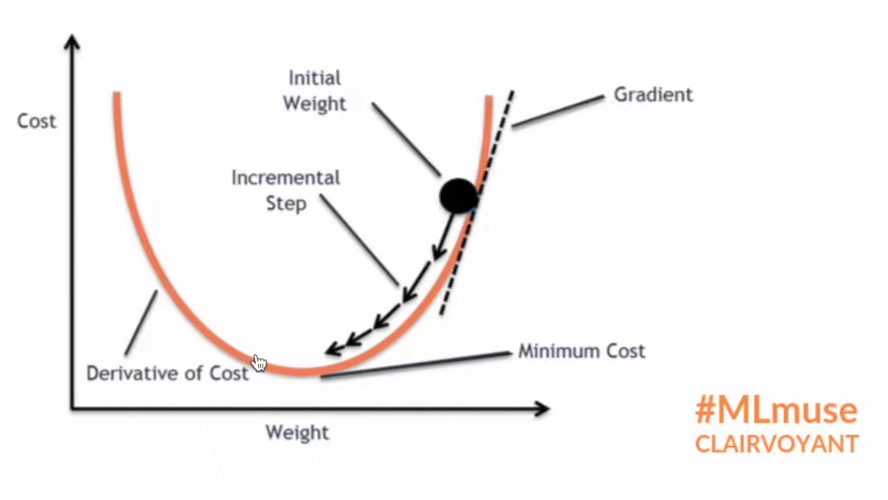

In [7]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64,drop_last=True)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = Sequential(
            Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x
    
loss = nn.CrossEntropyLoss() # 交叉熵    
tudui = Tudui()
for data in dataloader:
    imgs, targets = data
    outputs = tudui(imgs)
    result_loss = loss(outputs, targets) # 计算实际输出与目标输出的差距
    result_loss.backward()  # 计算出来的 loss 值有 backward 方法属性，反向传播来计算每个节点的更新的参数。这里查看网络的属性 grad 梯度属性刚开始没有，反向传播计算出来后才有，后面优化器会利用梯度优化网络参数。      
    print("ok")

Files already downloaded and verified
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
